In [2]:
# Import required libraries and download CIFAR10 dataset
import torchvision
import cv2
import matplotlib.pyplot as plt
import numpy as np
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)


Files already downloaded and verified


In [3]:
#dictionary for mapping the labels with indexes
label_names = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# a list named image for getting 1 image of each label
image = {}

# Append images in the list
for img, label in dataset:
    if label not in image:
        image[label] = img  # Store the first image of each label

# Function to convert PIL image to OpenCV BGR format
def pil_to_cv2_image(pil_img):
    img = np.array(pil_img)  # Convert PIL image to NumPy array (RGB)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    return img_bgr

# Function to display the accessed images
def display_all_images():
    for label, img in image.items():
        img_cv2 = pil_to_cv2_image(img)  # Convert to OpenCV format
        # Resizing so that the image is visible clearly
        img_cv2= cv2.resize(img_cv2,(320,320))
        # Display the image using OpenCV
        cv2.imshow(f'Label: {label_names[label]}', img_cv2)
        # Wait for a key press to display the next image
        cv2.waitKey(0)
    # Close all OpenCV windows
    cv2.destroyAllWindows()



In [28]:
display_all_images()

In [3]:
# Function to rotate the images by a particular angle
def images_after_rotating(angle):
    for label, img in image.items():
        img_cv2 = pil_to_cv2_image(img)  # Convert to OpenCV format
        # Resizing
        img_cv2= cv2.resize(img_cv2,(320,320))
        # Getting height and width of the image
        height,width=img_cv2.shape[0],img_cv2.shape[1]
        # Make the roatation matrix 
        M=cv2.getRotationMatrix2D(center=(width/2,height/2),angle=angle,scale =1)
        # Apply the matrix using warp affine
        img_rotated = cv2.warpAffine(img_cv2, M, (width, height))
        # Display the image using OpenCV
        cv2.imshow(f'Label: {label_names[label]}', img_rotated)

        # Wait for a key press to display the next image
        cv2.waitKey(0)
    # Close all OpenCV windows
    cv2.destroyAllWindows()

In [5]:
# Take input of the angle
angle = int(input("Enter angle by which you want to rotate each image:"))
images_after_rotating(angle)

In [30]:
# Function to verify whether the image comes same on rotating it 360/n times if the rotating angle is n
for label, img in image.items():
        img_cv2 = pil_to_cv2_image(img)  # Convert to OpenCV format
        img_cv2= cv2.resize(img_cv2,(320,320))
        
        height,width=img_cv2.shape[0],img_cv2.shape[1]
        M=cv2.getRotationMatrix2D(center=(width/2,height/2),angle=120,scale =1)

        for i in range(3):
            img_cv2 = cv2.warpAffine(img_cv2, M, (width, height))

        # Display the image using OpenCV
        cv2.imshow(f'Label: {label_names[label]}', img_cv2)

        # Wait for a key press to display the next image
        cv2.waitKey(0) 
# Close all OpenCV windows
cv2.destroyAllWindows()

# By the output of this particular cell, we observe that after the rotating n times with angle=360/n degrees, the orientation
# comes back to be the same but the image is not exactly same as the original because of the change in shape of the borders

In [4]:
def plot_image_with_histogram(label):
    # Access the image using the label
    img = image[label]  

    # Convert the image to OpenCV format
    img_cv2 = pil_to_cv2_image(img)  

    # Convert the image to grayscale using cvt color function
    gray_image = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot the original image and its histogram
    plt.figure(figsize=(10, 5))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'Grayscale Image: {label_names[label]}')
    plt.axis('off')  # Turn off axis

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlim([0, 256])  # Set x-axis limit
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

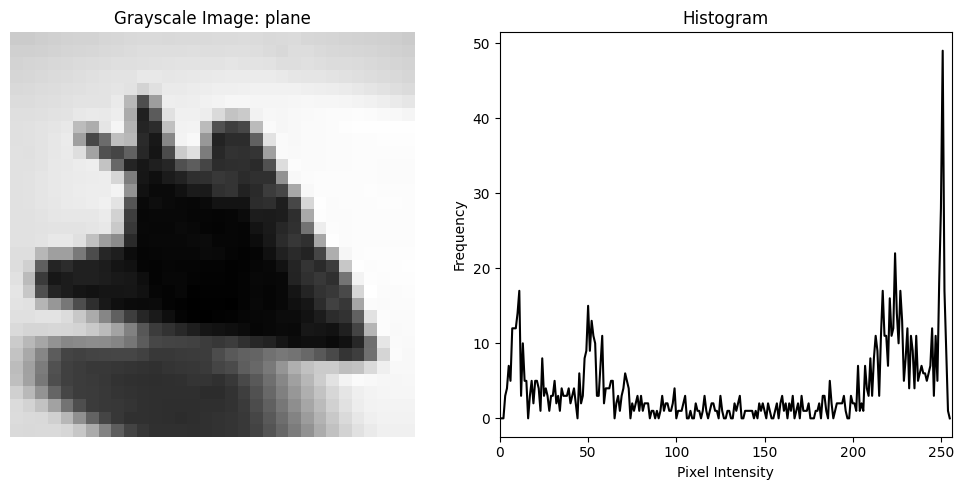

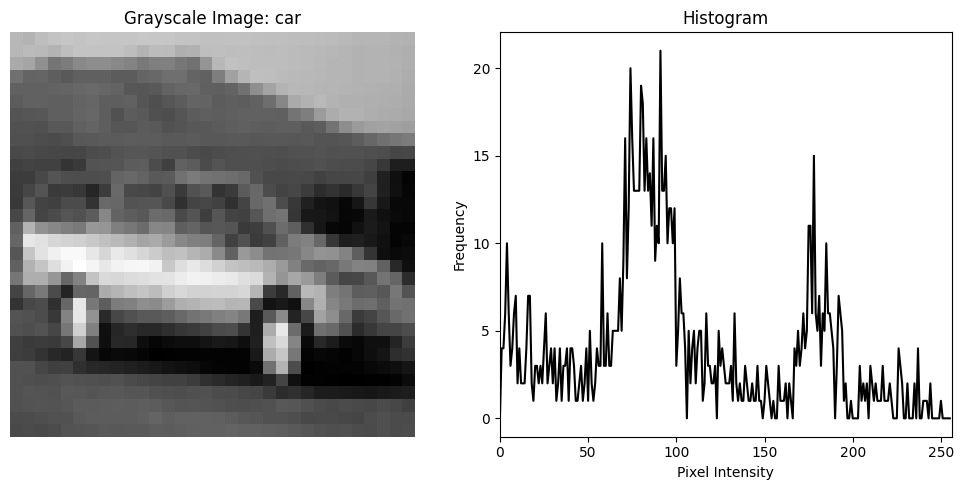

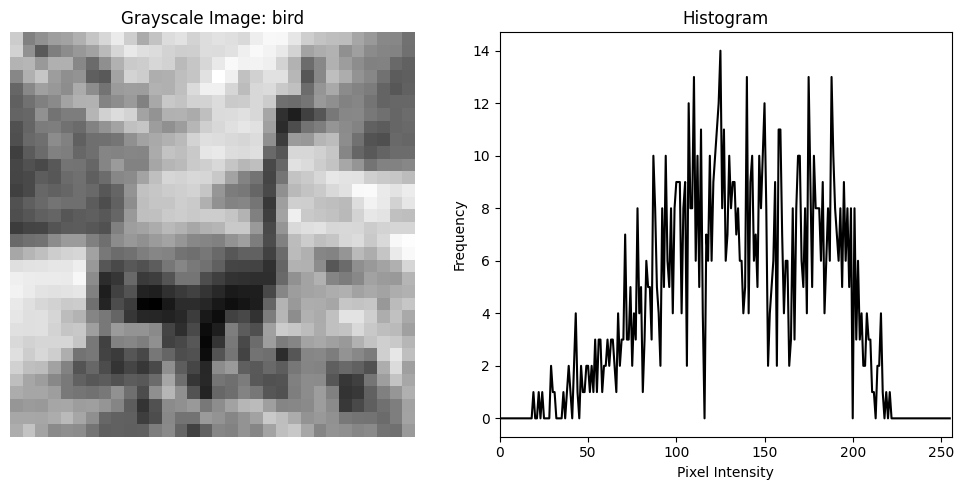

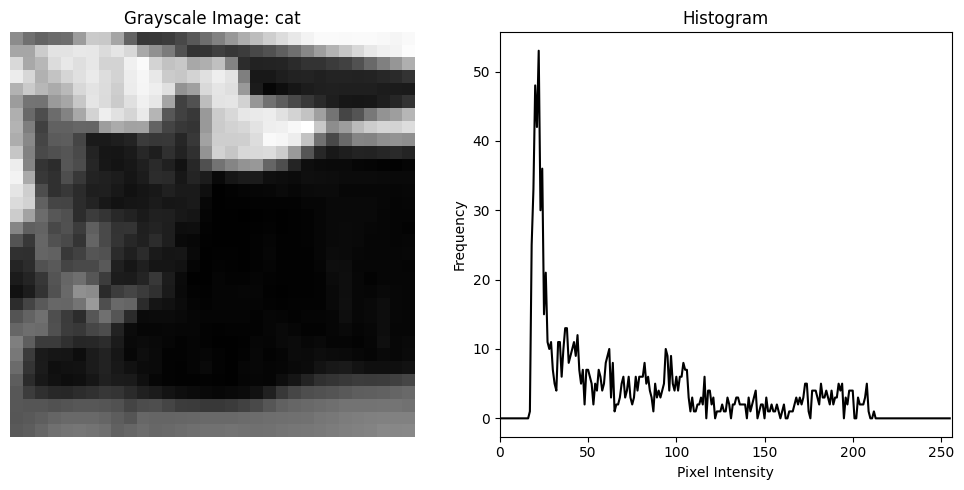

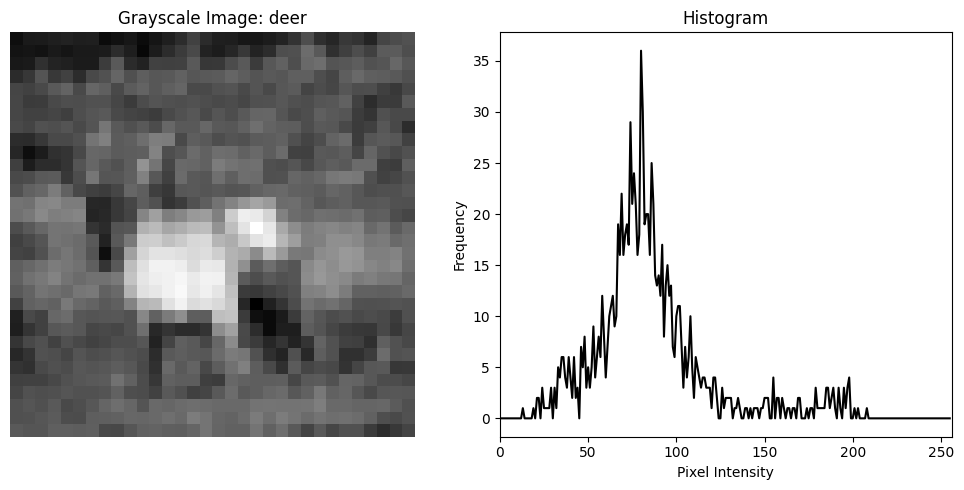

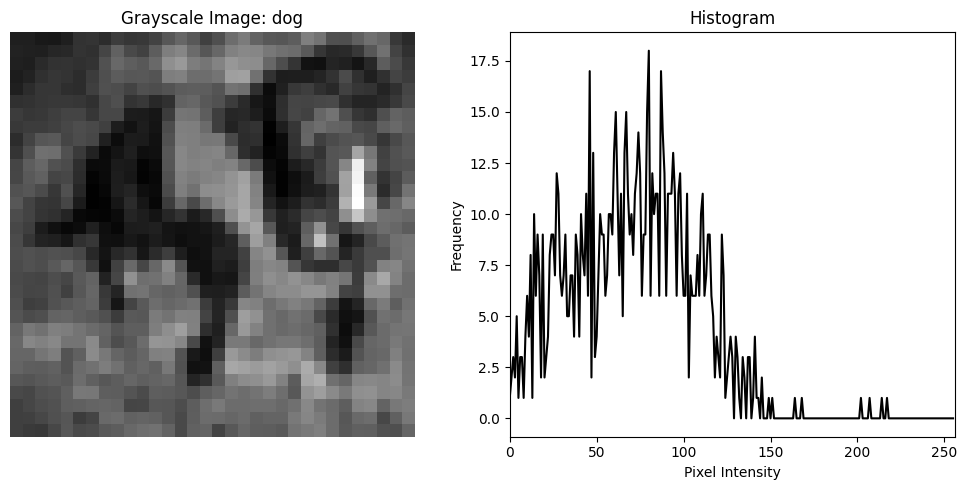

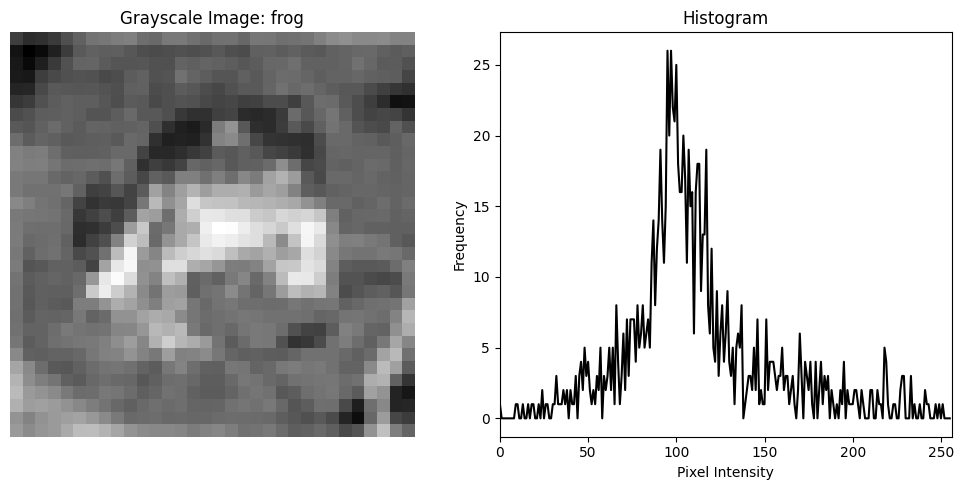

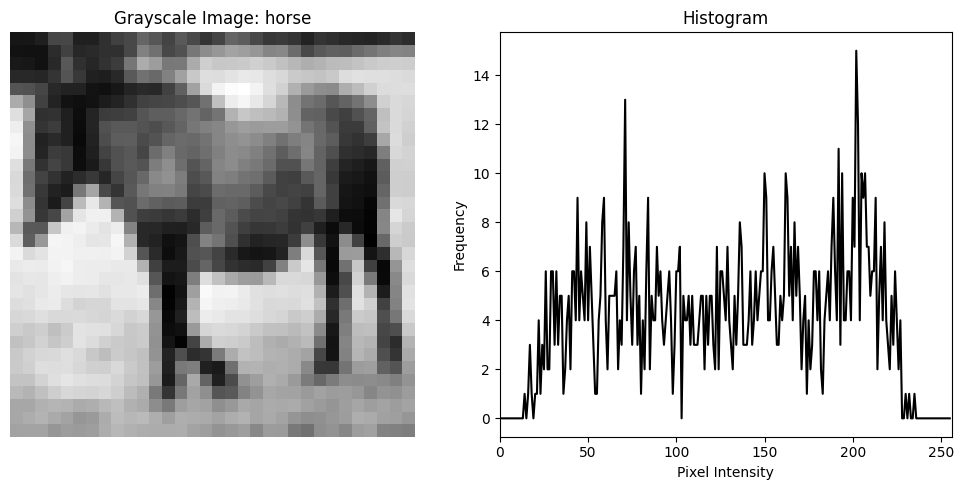

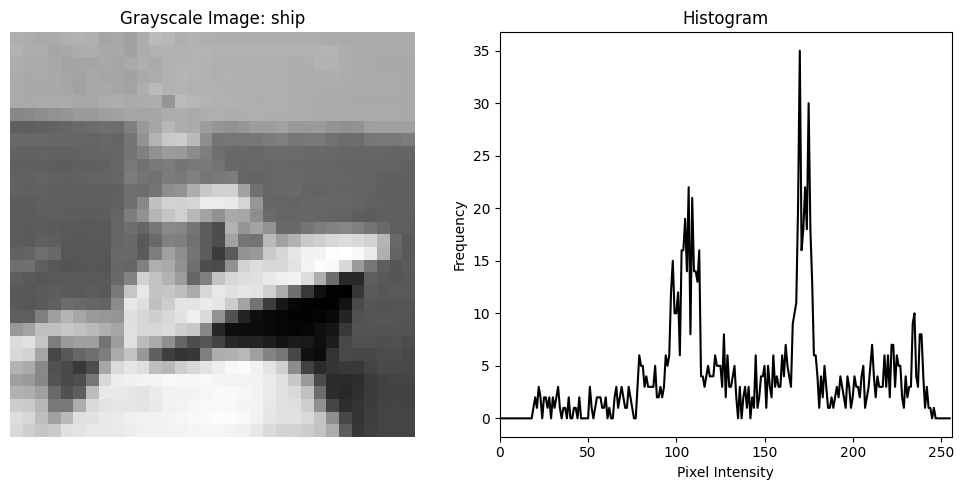

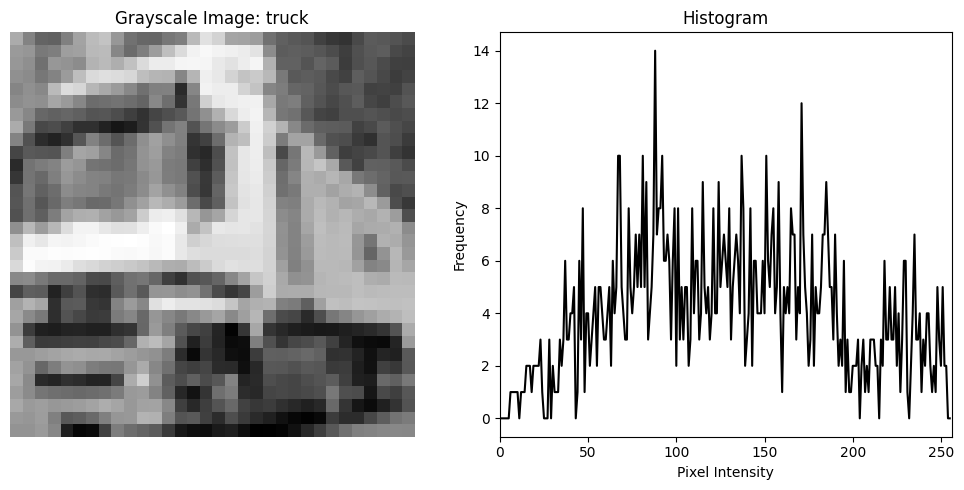

In [5]:
for label in label_names:
    plot_image_with_histogram(label)

In [5]:
def plot_image_with_normalised_histogram(label):
    # Access the image using the label
    img = image[label]  

    # Convert the image to OpenCV format
    img_cv2 = pil_to_cv2_image(img)  

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    height,width=gray_image.shape

    # For nomalisation find number of pixels
    num_pixels=height*width
    hist_normalised=hist/num_pixels

    # Plot the original image and its histogram
    plt.figure(figsize=(10, 5))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'Grayscale Image: {label_names[label]}')
    plt.axis('off')  

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.plot(hist_normalised, color='black')
    plt.title('Histogram')
    plt.xlim([0, 256]) 
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

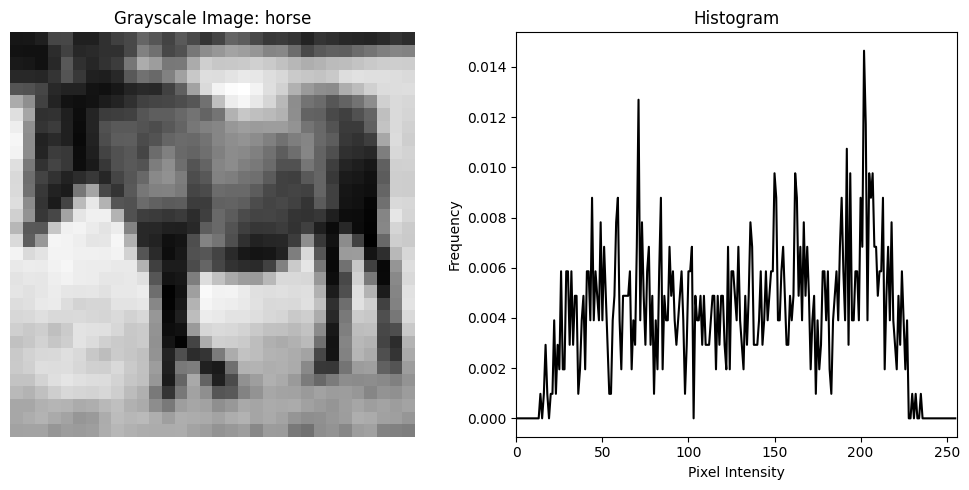

In [10]:
plot_image_with_normalised_histogram(7)

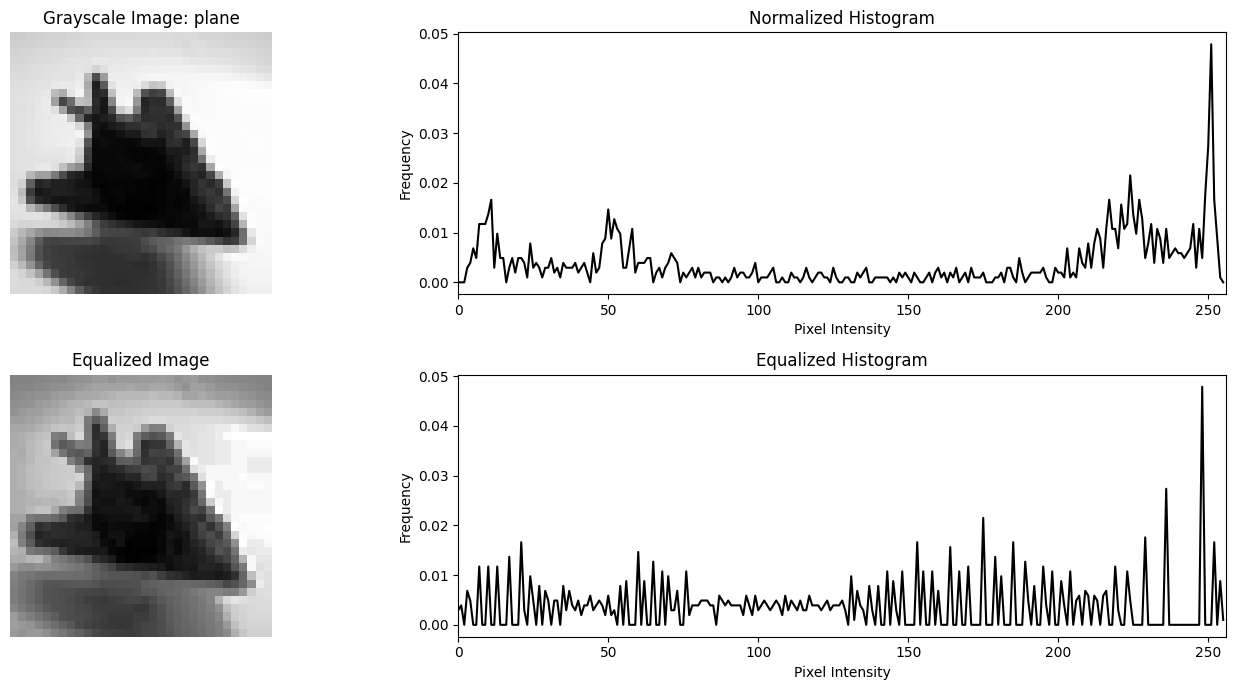

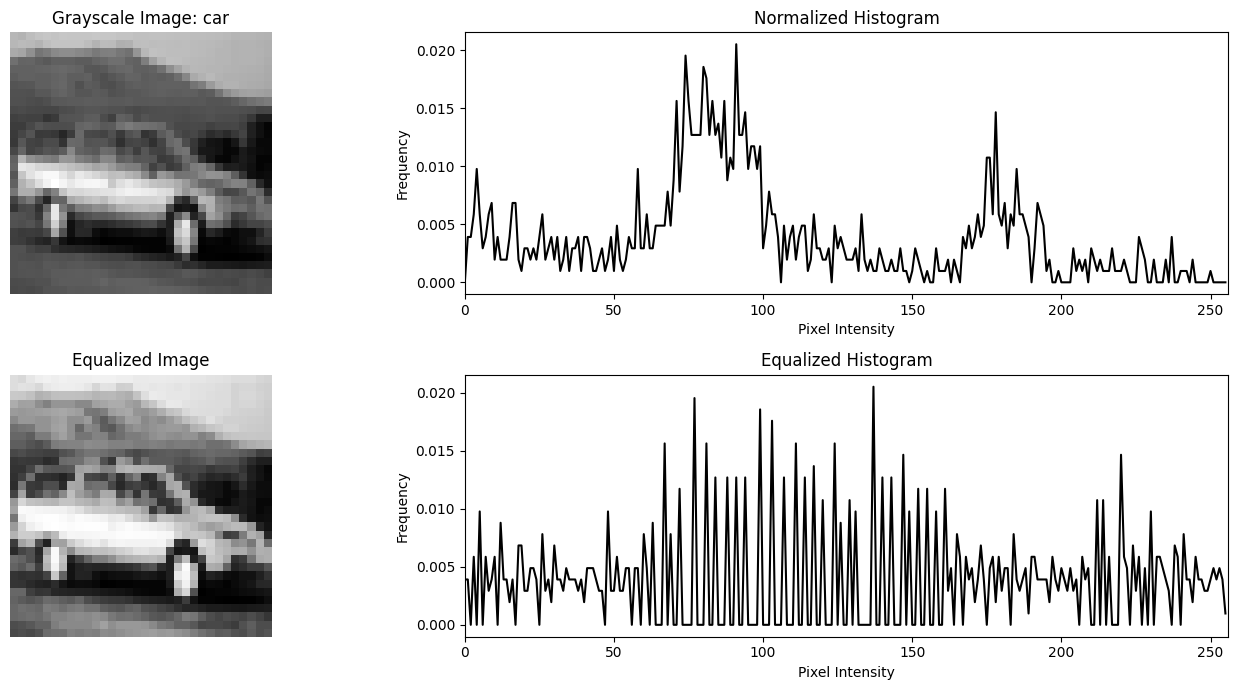

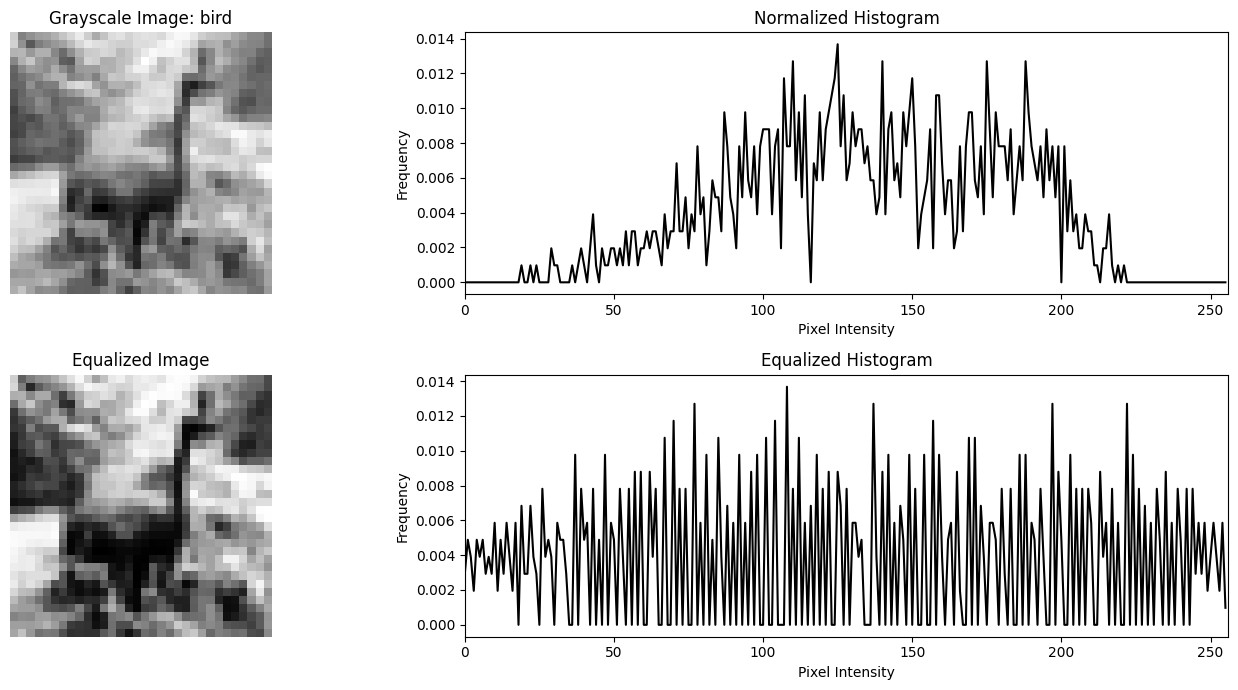

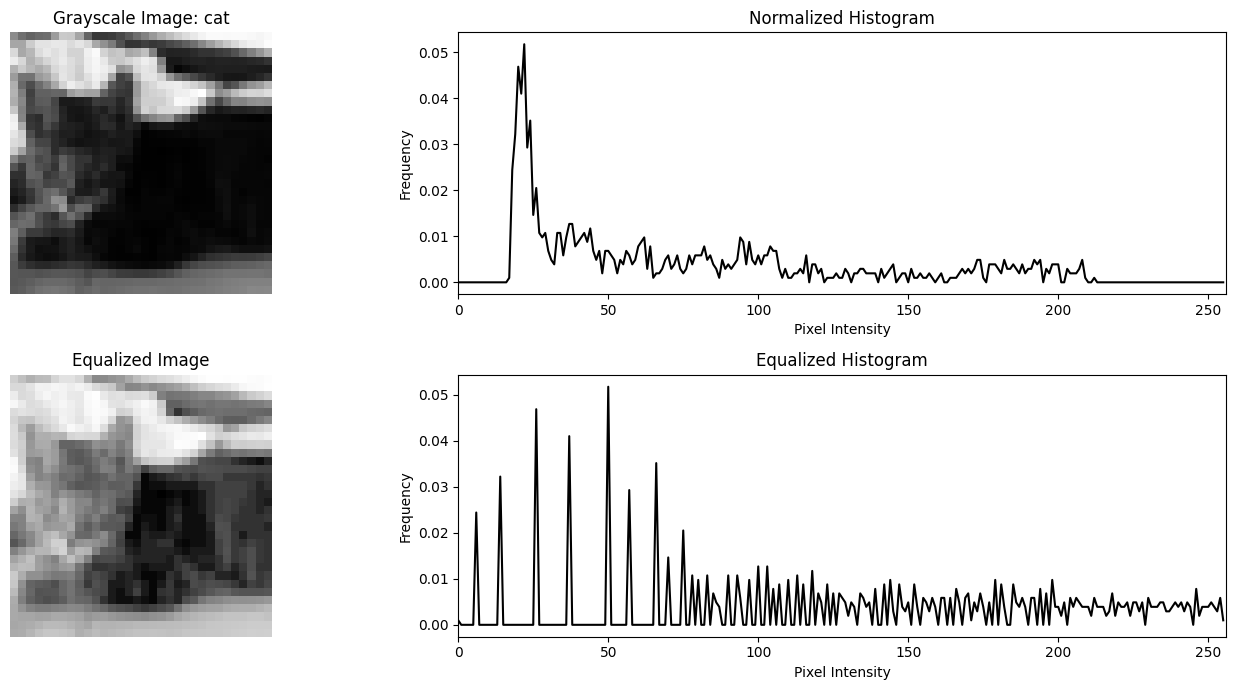

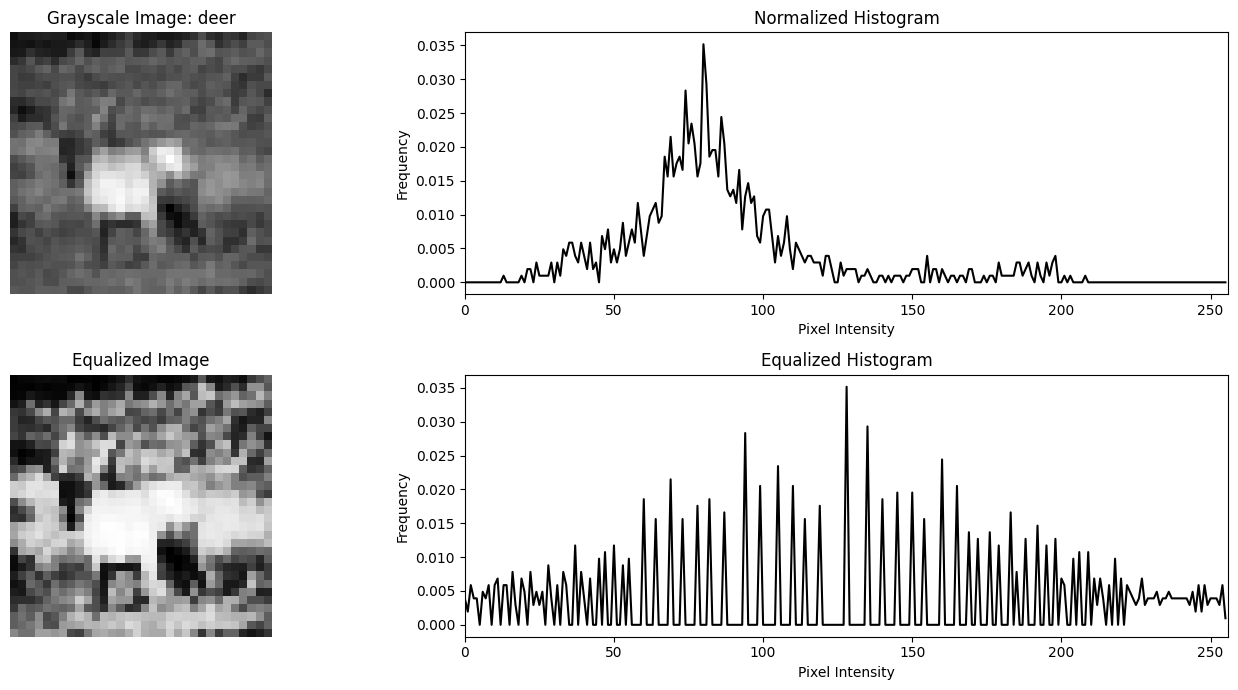

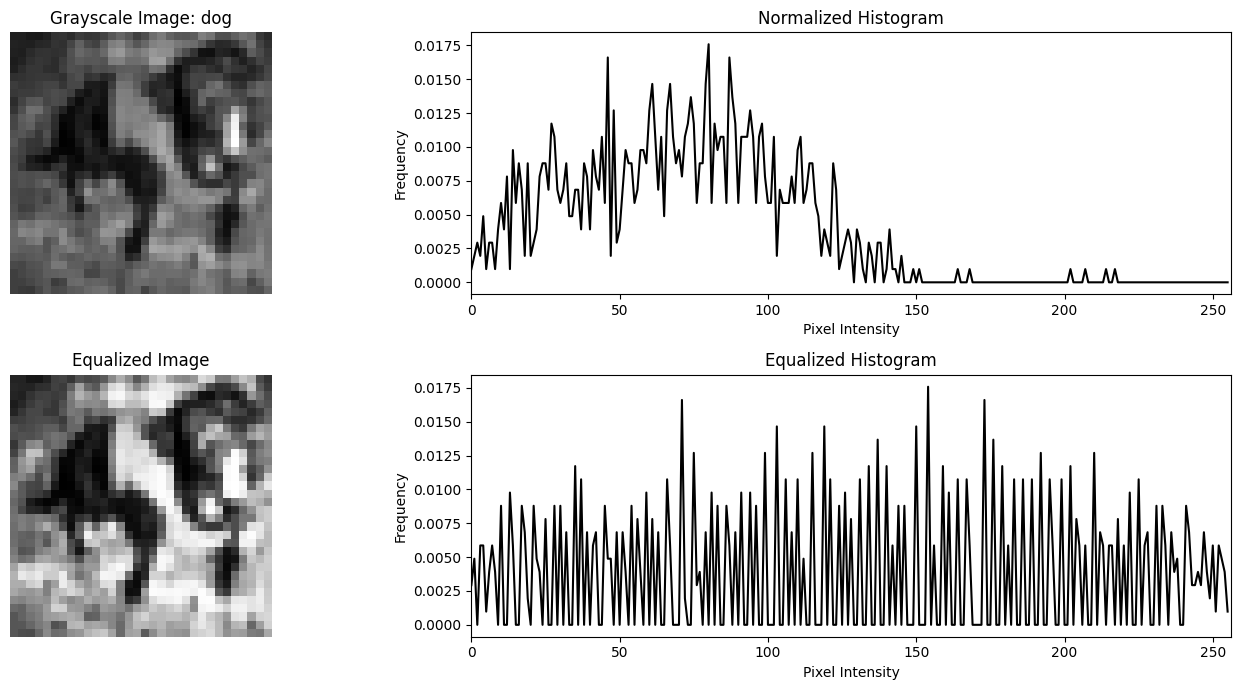

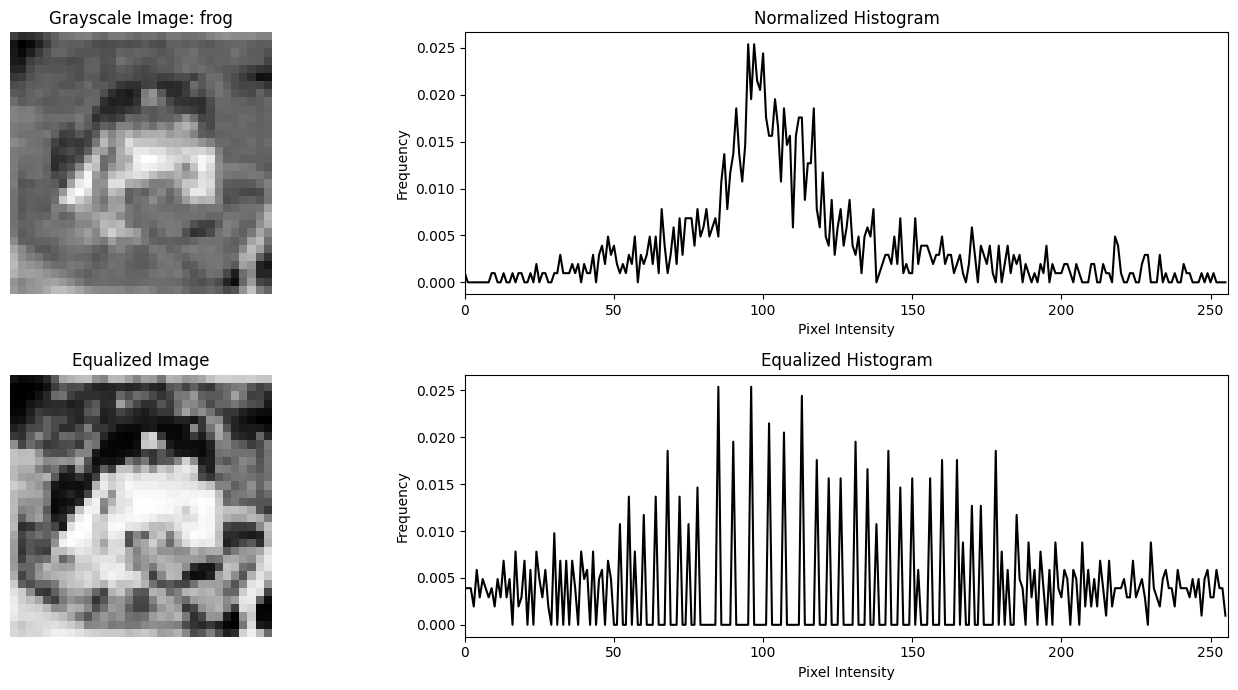

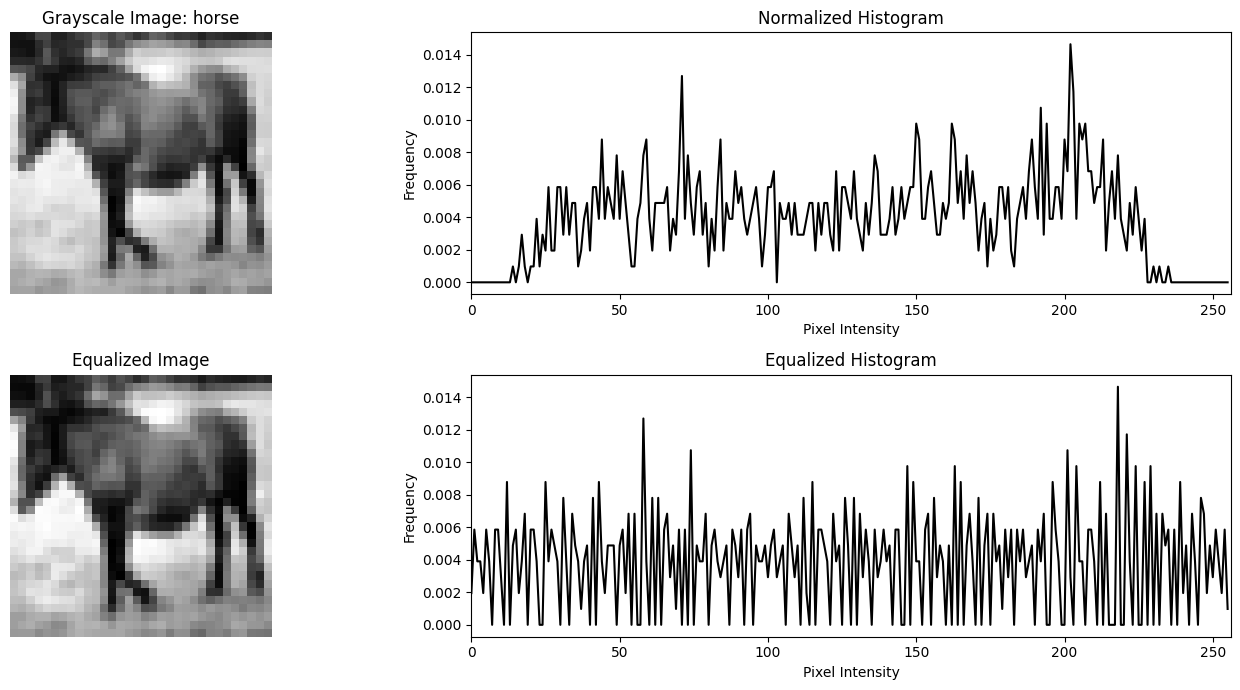

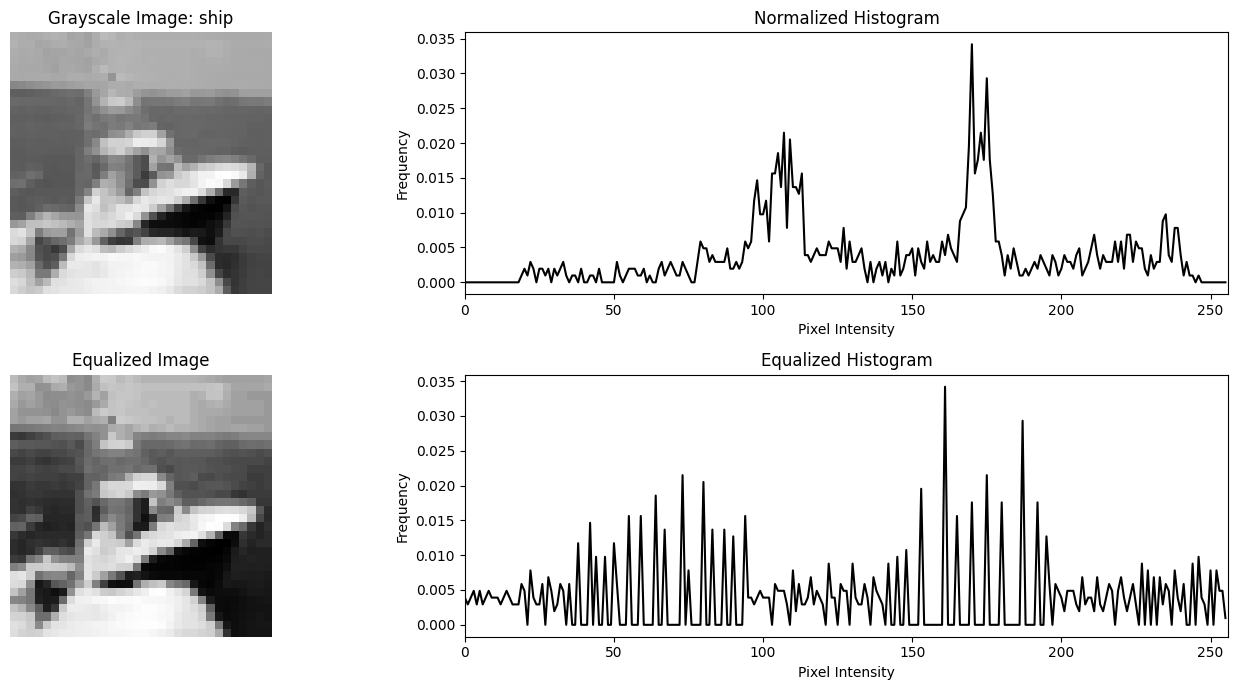

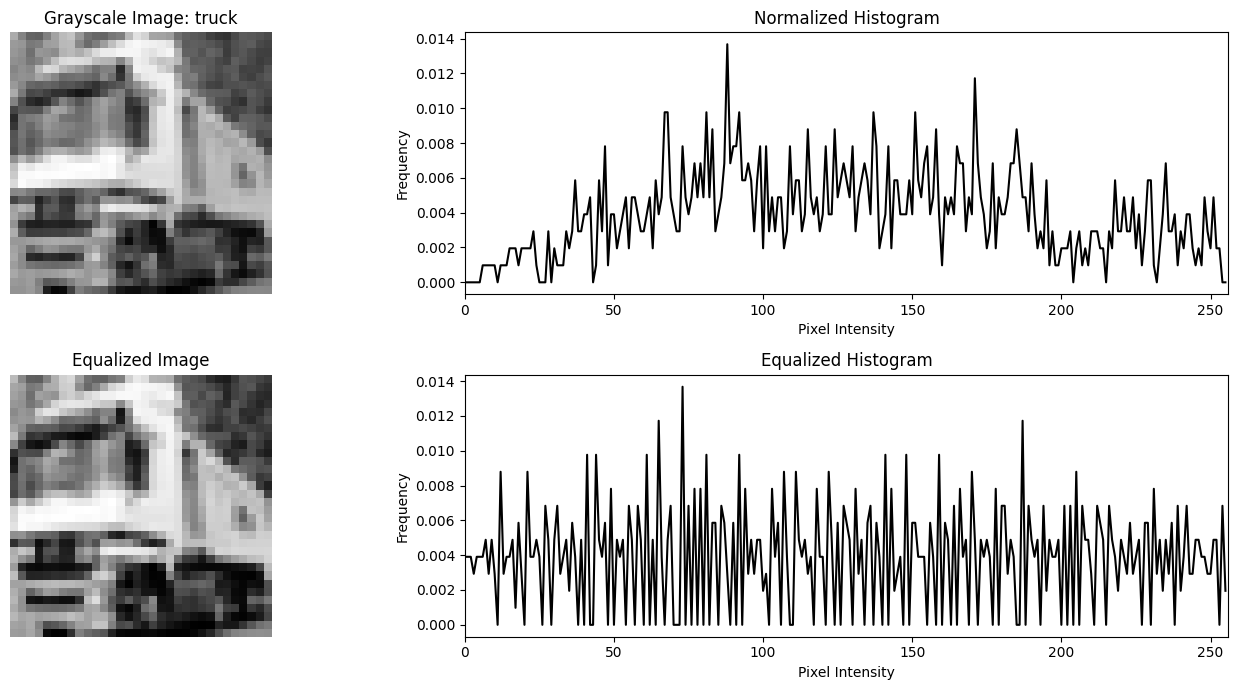

In [6]:
def plot_image_with_equalized_histogram(label):
    # Access the image using the label
    img = image[label]  

    # Convert the image to OpenCV format
    img_cv2 = pil_to_cv2_image(img) 

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Normalize the histogram
    height, width = gray_image.shape
    num_pixels = height * width
    hist_normalized = hist / num_pixels
    
    # Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(hist_normalized)
    
    # Normalize the CDF
    cdf_normalized = cdf * 255 / cdf[-1]  # Scale the CDF to [0, 255]

    # Create an equalized image using the normalized CDF
    equalized_image = cv2.LUT(gray_image, cdf_normalized.astype('uint8'))  # Use LUT for fast mapping

    # Calculate the equalized histogram
    hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
    hist_equalized_normalized = hist_equalized / num_pixels  # Normalize the equalized histogram

    # Plot the original and equalized images with their histograms
    plt.figure(figsize=(15, 7))

    # Plot the original image and its normalized histogram
    plt.subplot(2, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'Grayscale Image: {label_names[label]}')
    plt.axis('off')  

    plt.subplot(2, 2, 2)
    plt.plot(hist_normalized, color='black')
    plt.title('Normalized Histogram')
    plt.xlim([0, 256])  
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Plot the equalized image
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')  

    # Plot the equalized histogram
    plt.subplot(2, 2, 4)
    plt.plot(hist_equalized_normalized, color='black')
    plt.title('Equalized Histogram')
    plt.xlim([0, 256])  
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

for label in range(10):  
    plot_image_with_equalized_histogram(label)

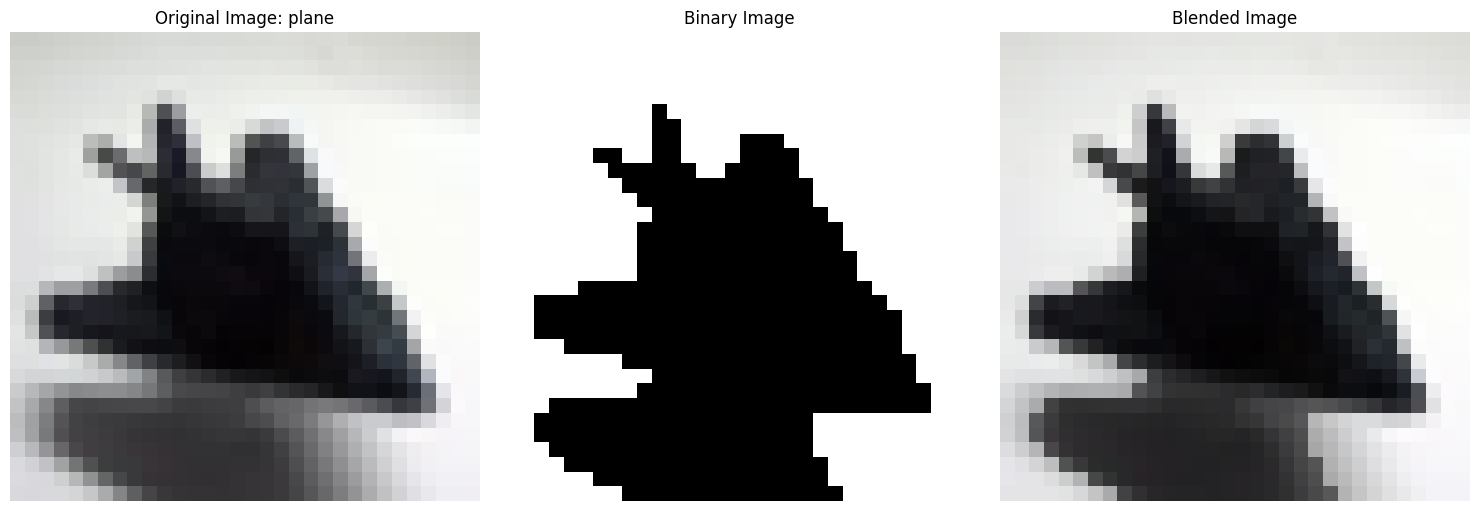

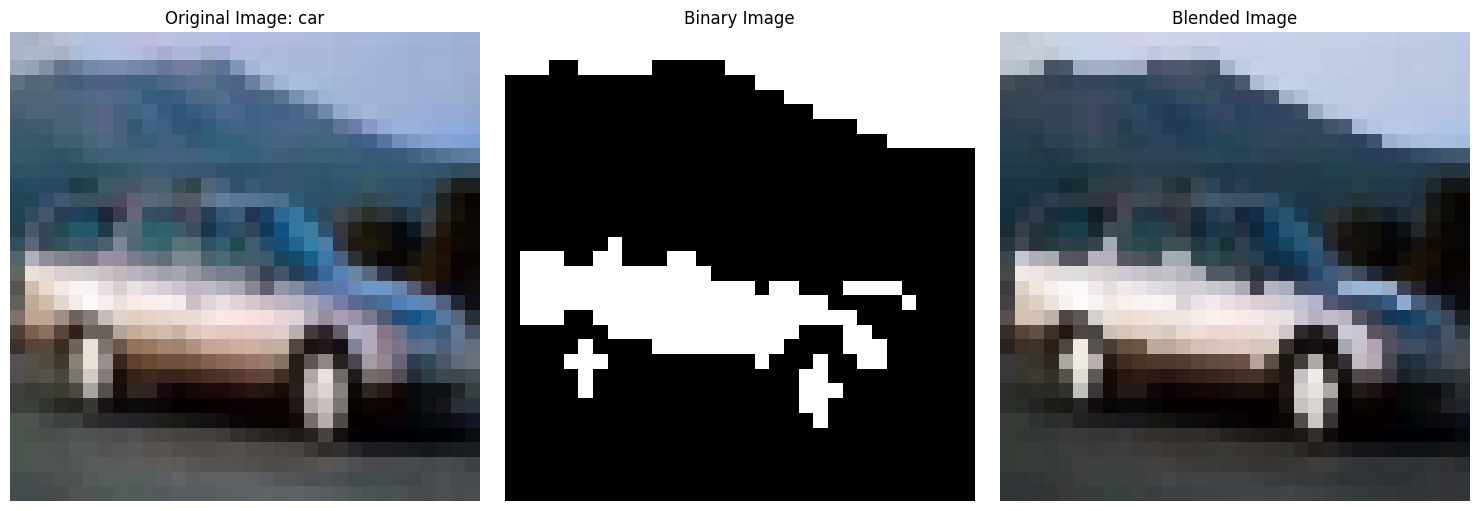

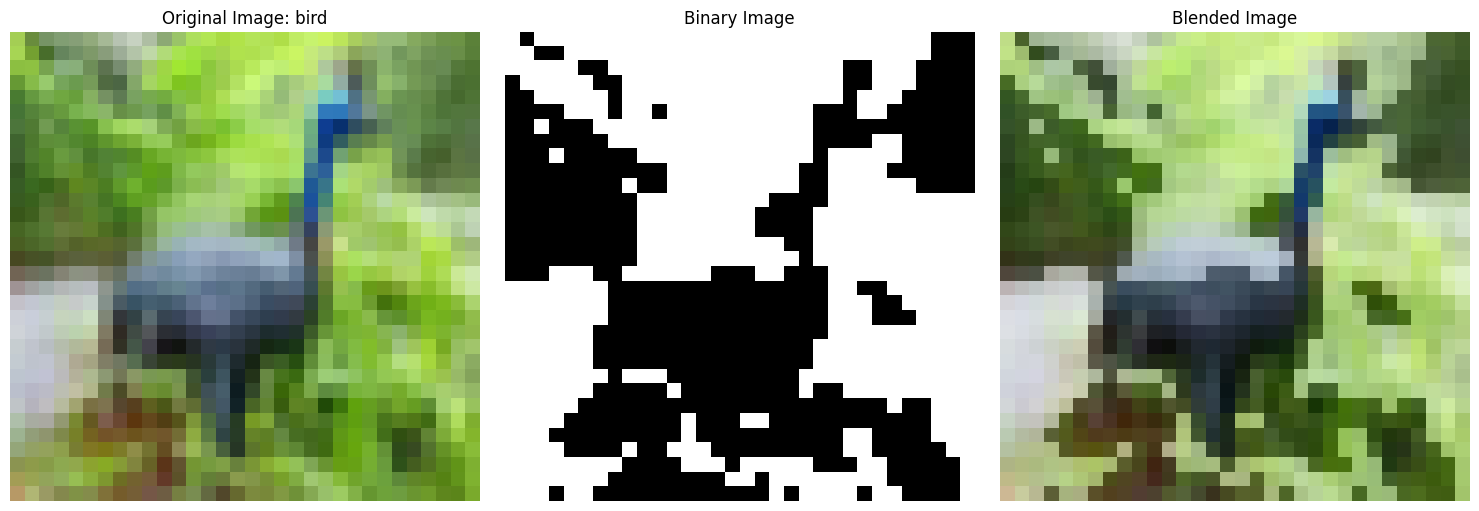

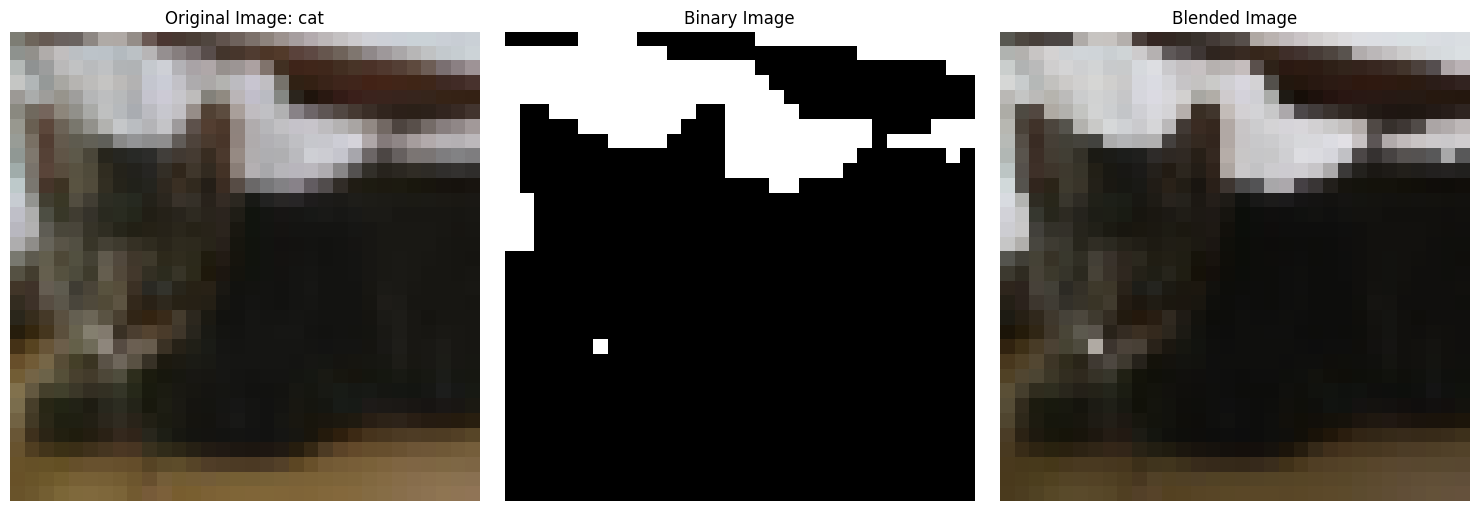

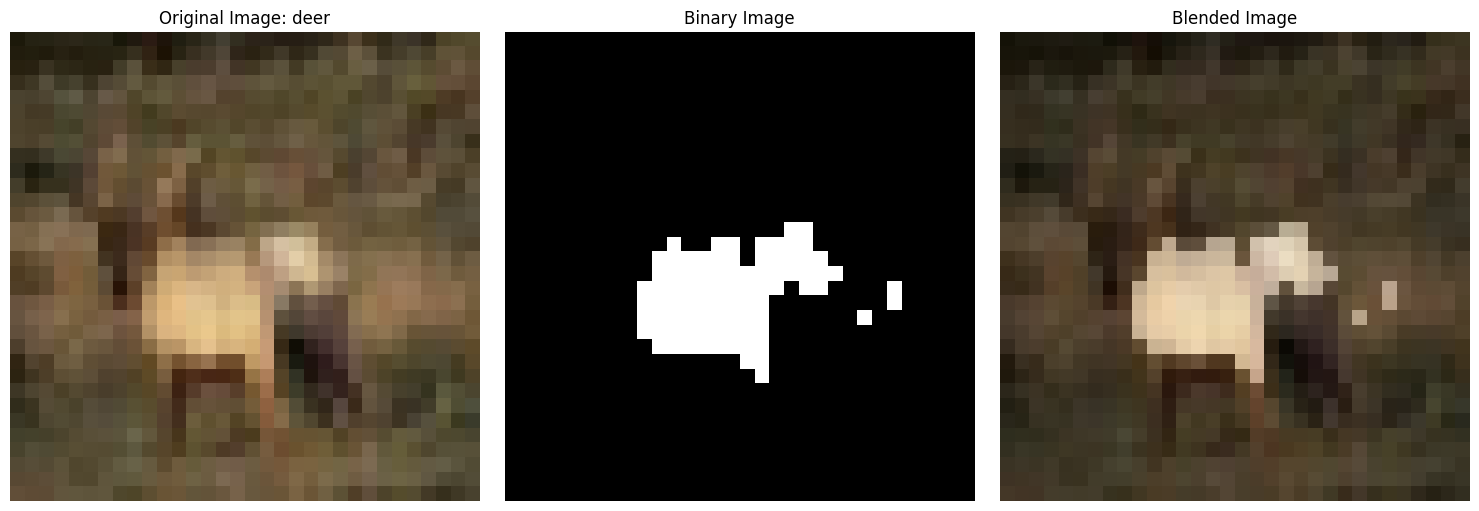

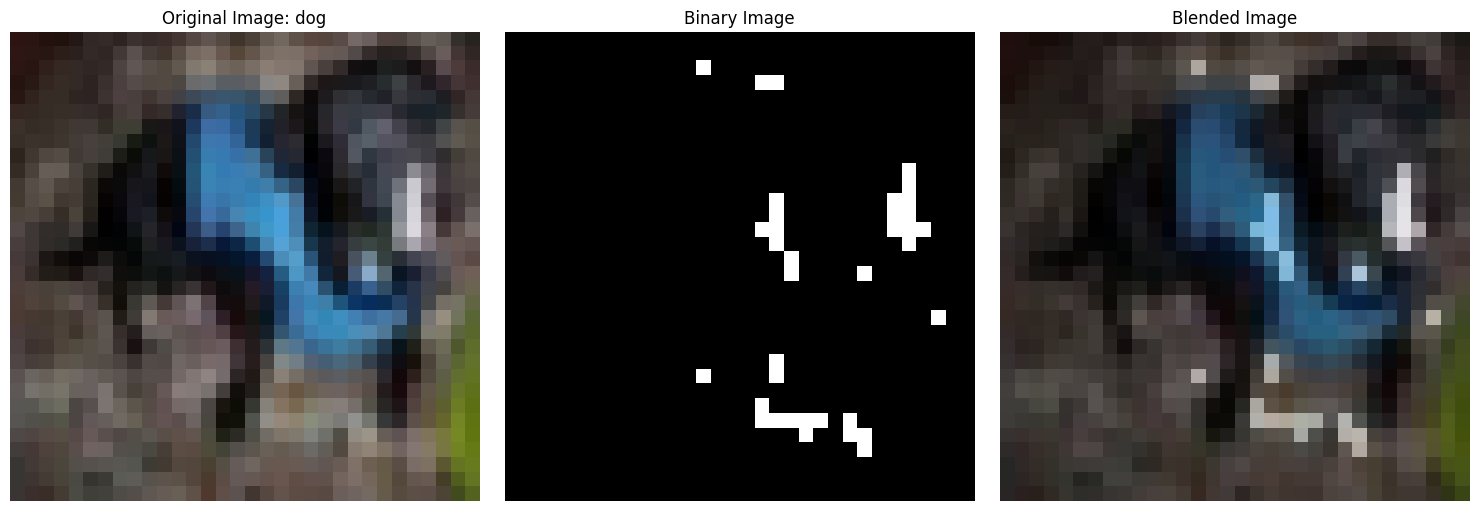

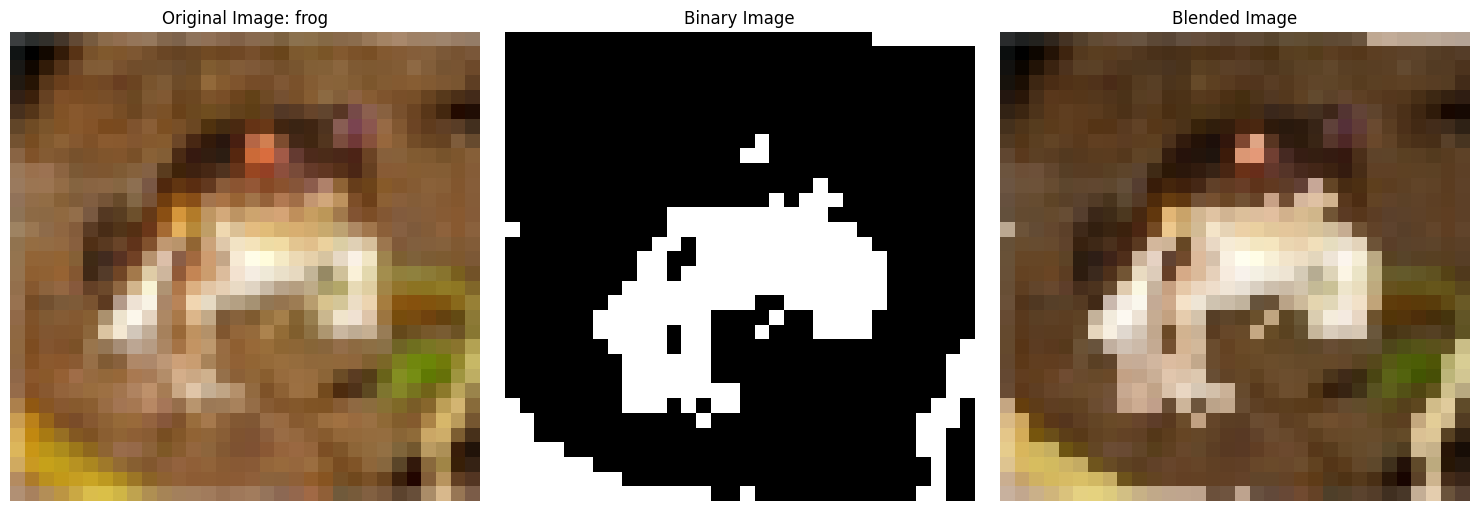

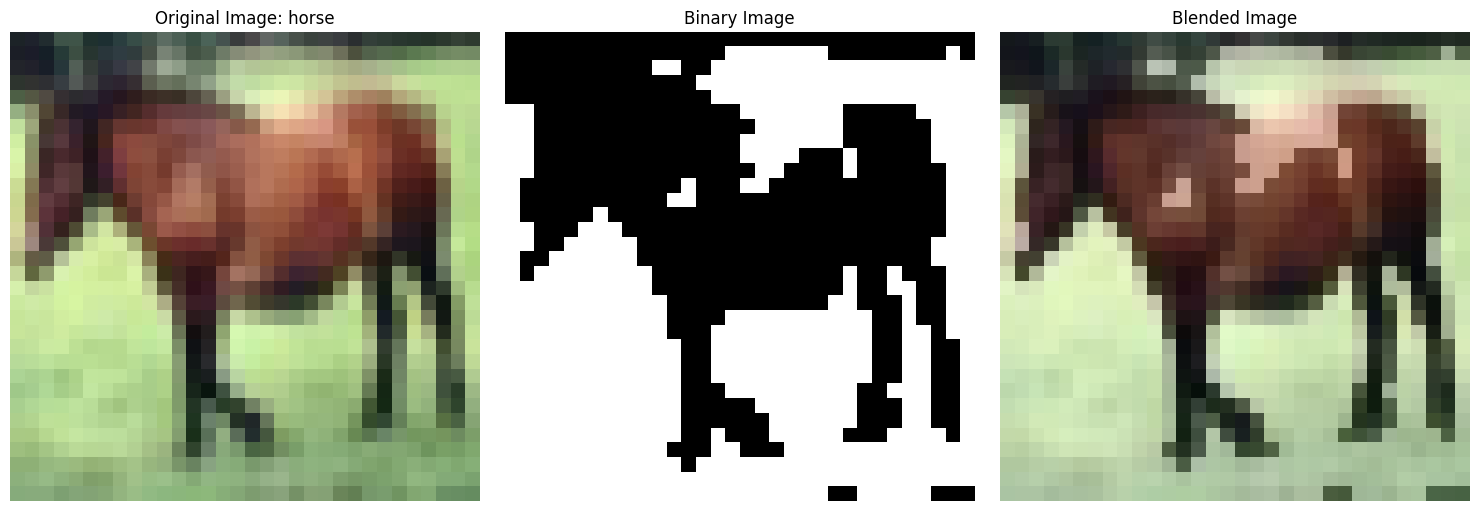

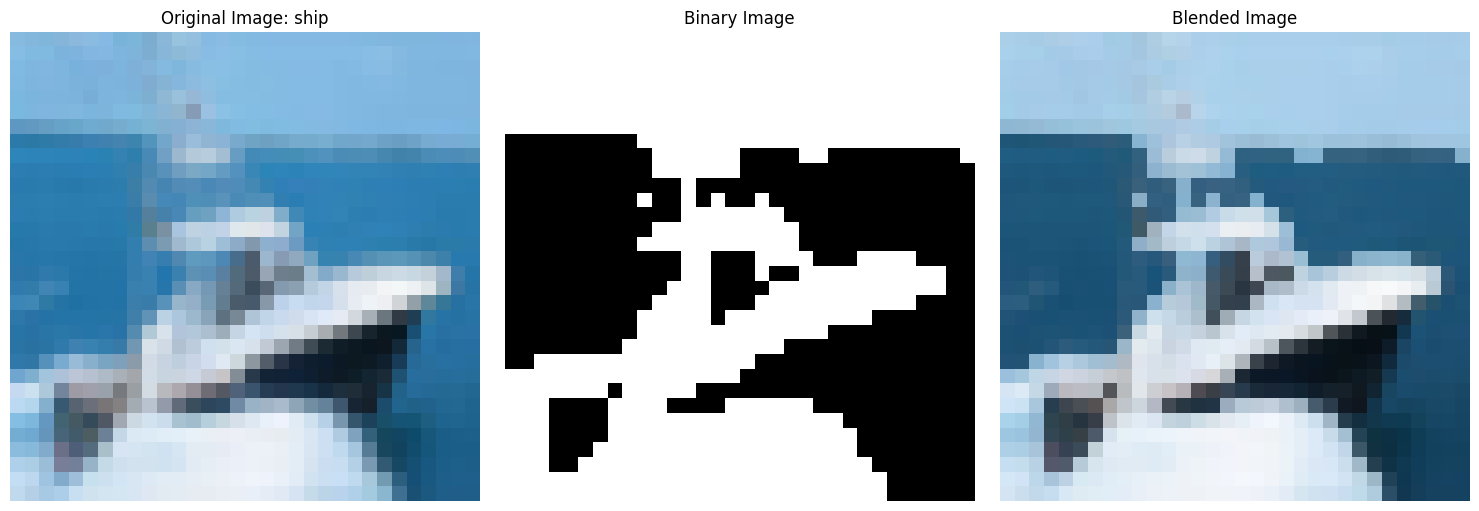

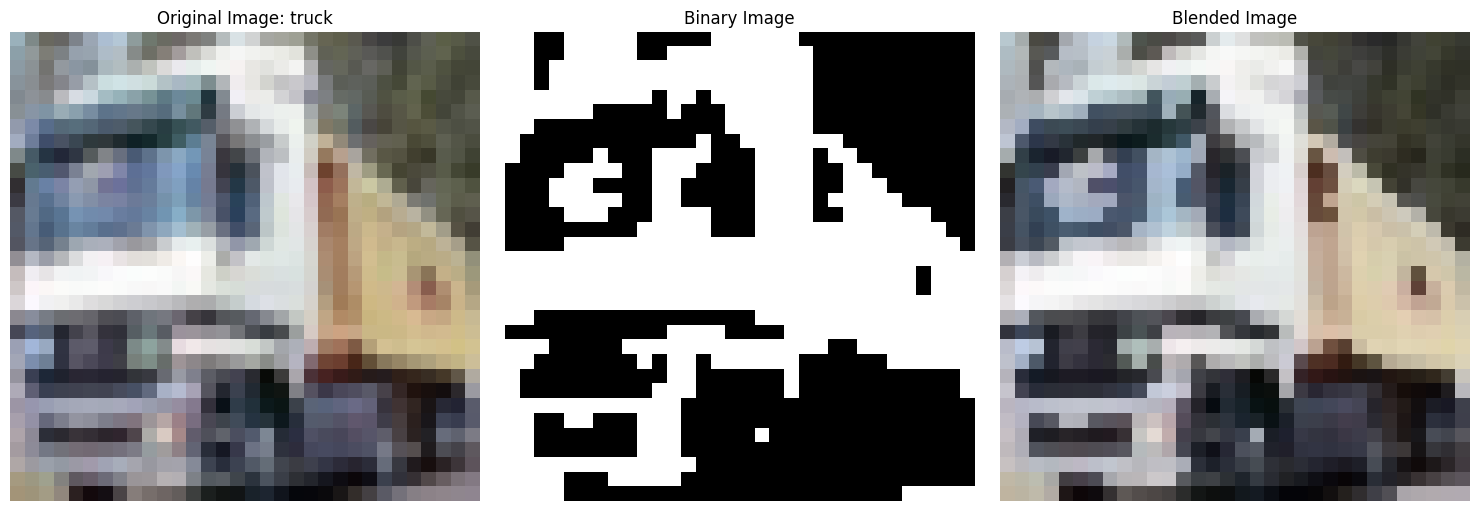

In [21]:
# Function to apply binary threshold and blend it with the image
def plot_binary_and_blend(label):
    # Access the image using the label
    img = image[label] 

    # Convert the image to OpenCV format
    img_cv2 = pil_to_cv2_image(img)  

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold
    threshold_value = 128  
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Blend the binary image with the original image according to particular weights
    blended_image = cv2.addWeighted(img_cv2, 0.7, cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR), 0.3, 0)

    # Plot the original image, binary image, and blended image
    plt.figure(figsize=(15, 5))

    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image: {label_names[label]}')
    plt.axis('off') 

    # Plot the binary image
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')  

    # Plot the blended image
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title('Blended Image')
    plt.axis('off')  

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example Usage
for label in range(10): 
    plot_binary_and_blend(label)


In [8]:
# Function to find the dft, reconstructed image and error
def process_and_plot_image(img):
    img1=pil_to_cv2_image(img)

    # Convert the image to grayscale
    image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

    # Compute the 2D DFT
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_magnitude = cv2.magnitude(dft[:, :, 0], dft[:, :, 1])  # Calculate magnitude
    dft_magnitude = np.log1p(dft_magnitude)  # Log scale for better visibility

    # Perform the inverse DFT
    idft = cv2.idft(dft)
    reconstructed = cv2.magnitude(idft[:, :, 0], idft[:, :, 1])

    # Normalize reconstructed image to range [0, 255]
    reconstructed = cv2.normalize(reconstructed, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Calculate error
    error = cv2.absdiff(image, reconstructed)

    plt.figure(figsize=(12, 8))
    
    # Plot for original image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot for DFT
    plt.subplot(2, 2, 2)
    plt.imshow(dft_magnitude, cmap='gray')
    plt.title('DFT Magnitude')
    plt.axis('off')

    # Plot for reconstructed image
    plt.subplot(2, 2, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    # Plot for Error
    plt.subplot(2, 2, 4)
    plt.imshow(error, cmap='gray')
    plt.title('Reconstruction Error')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


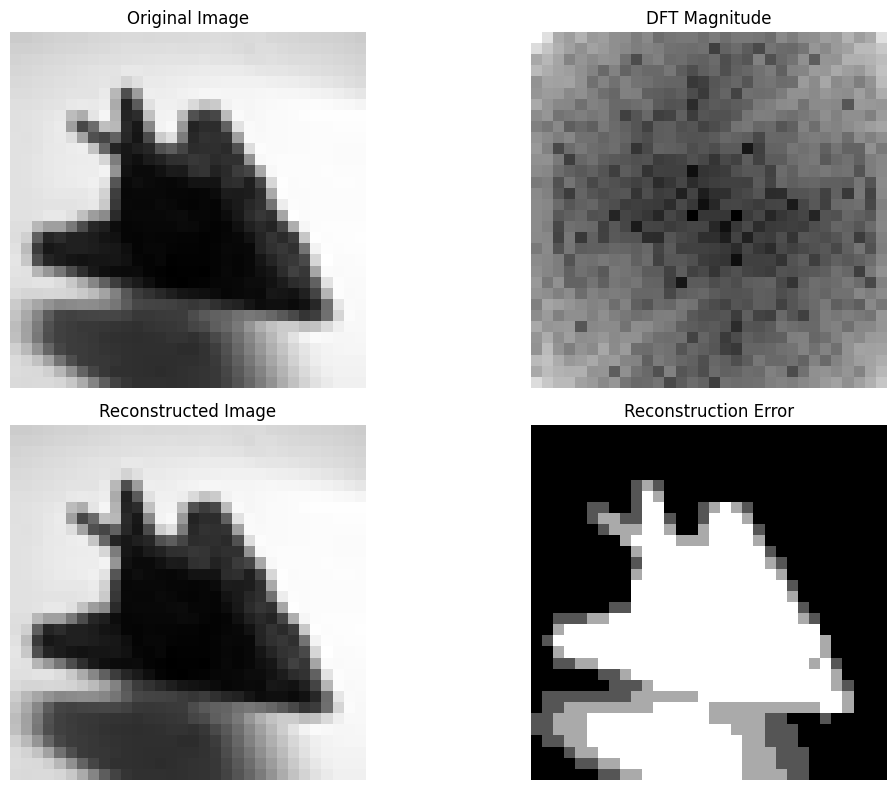

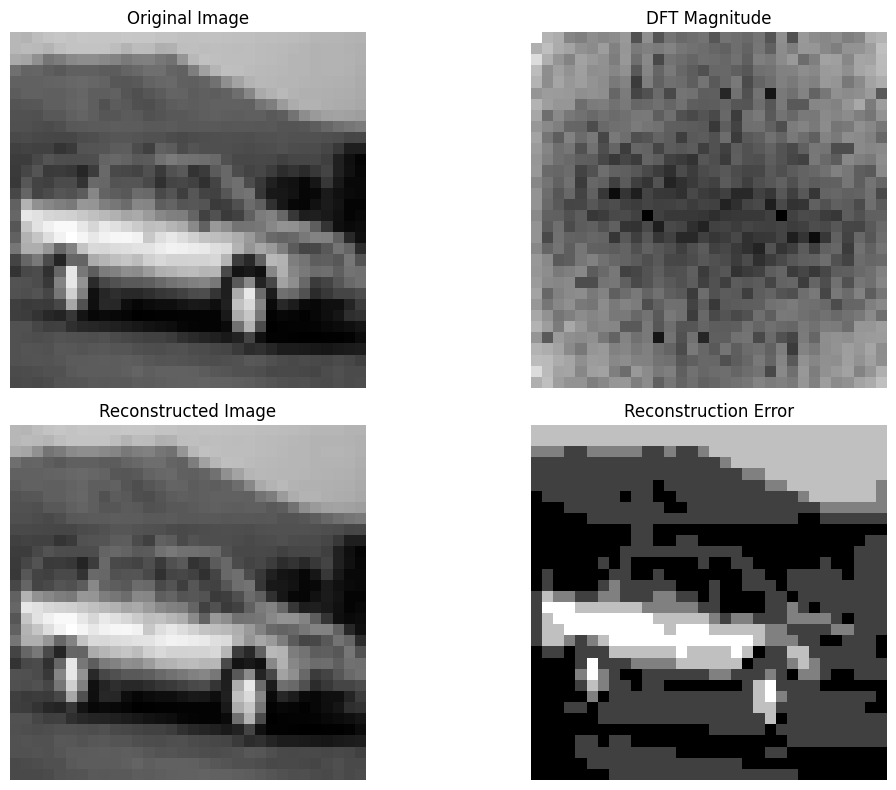

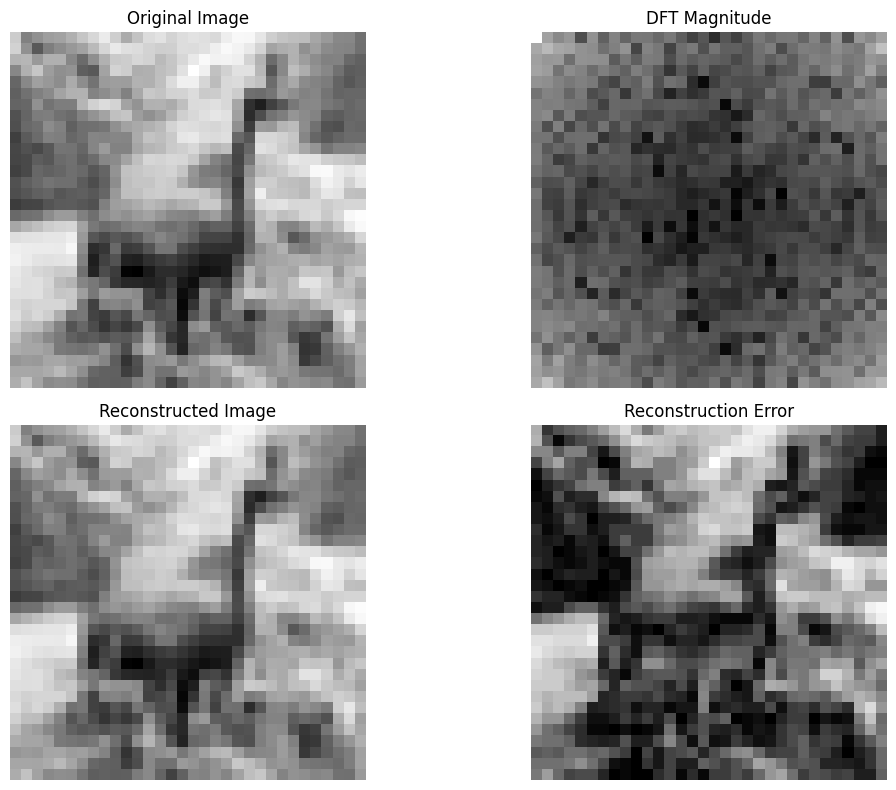

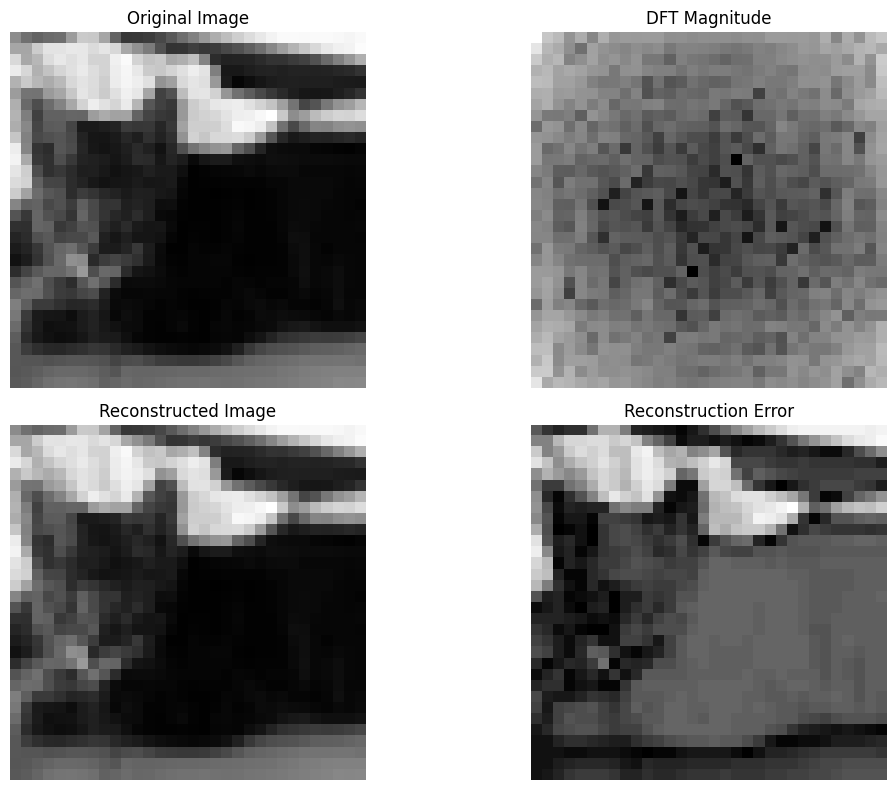

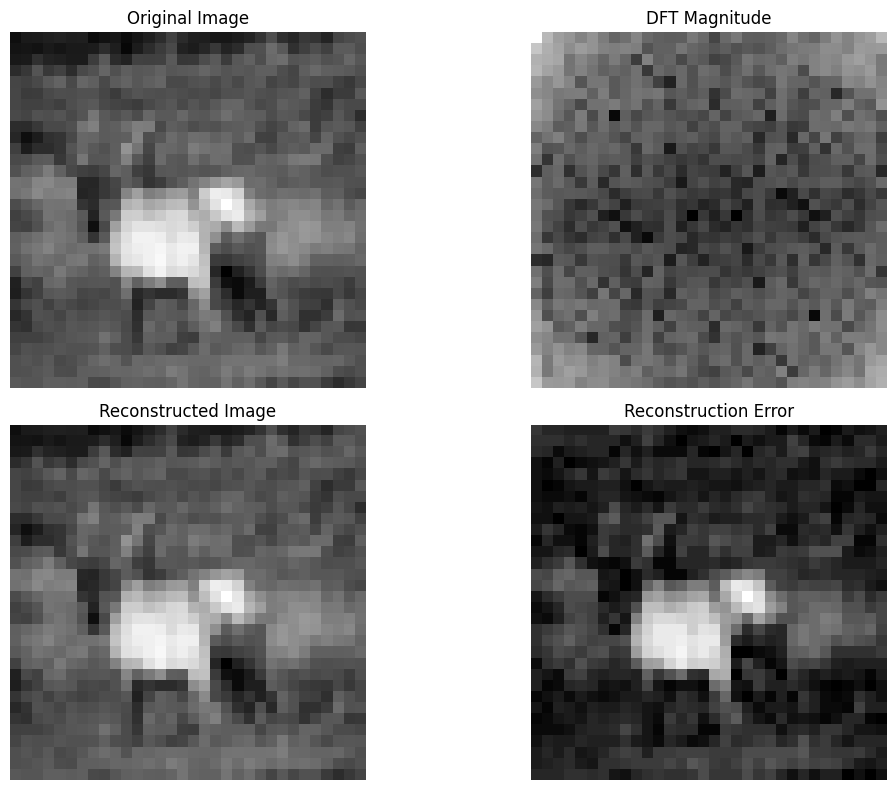

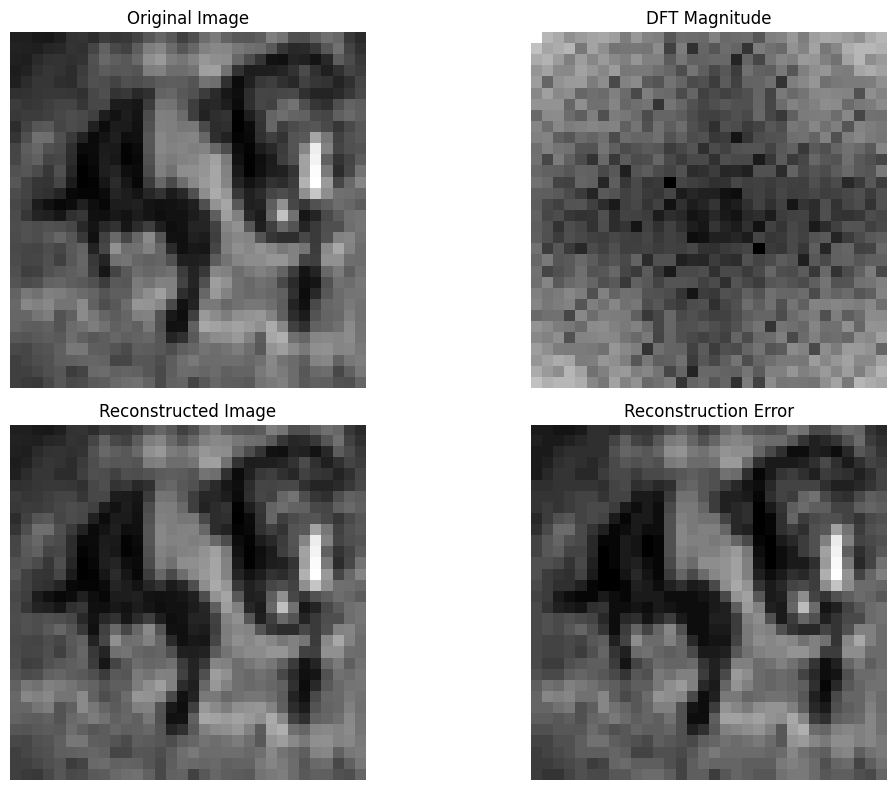

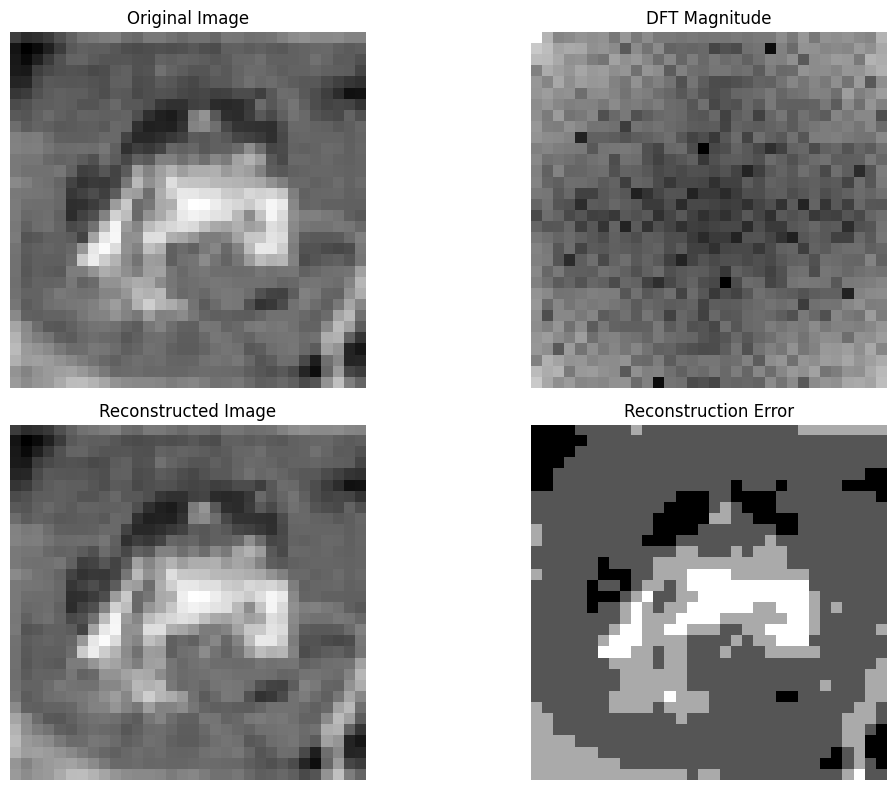

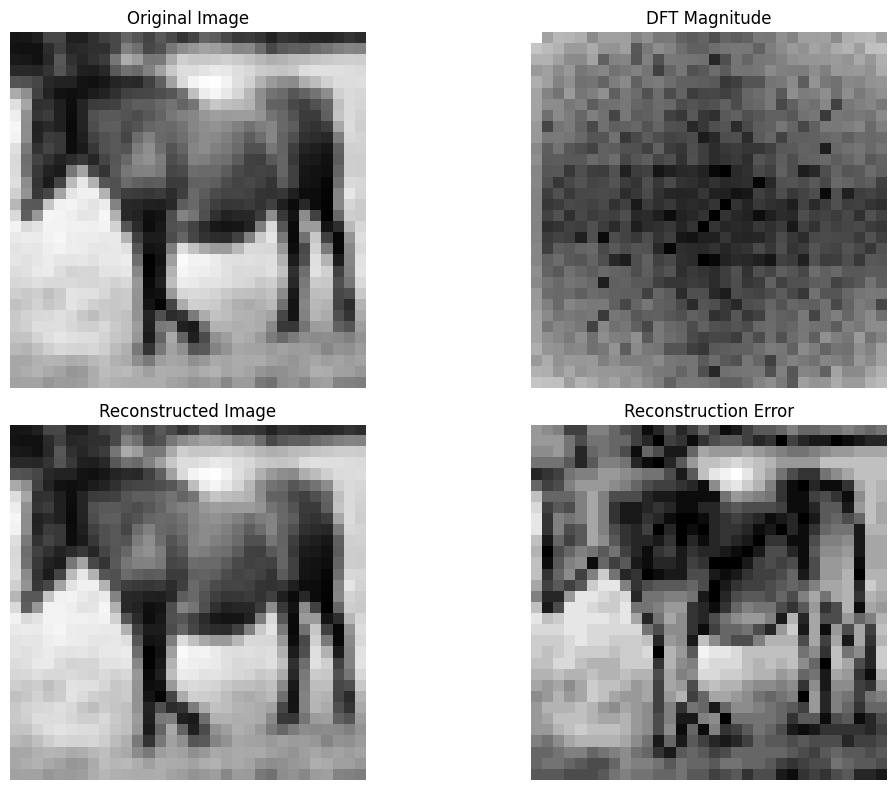

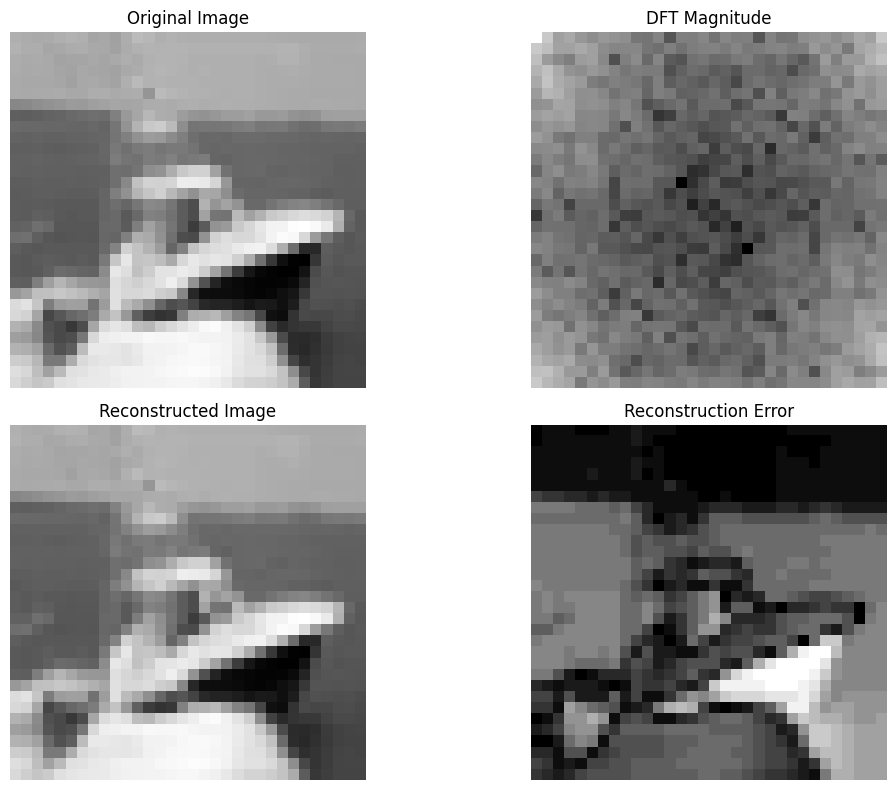

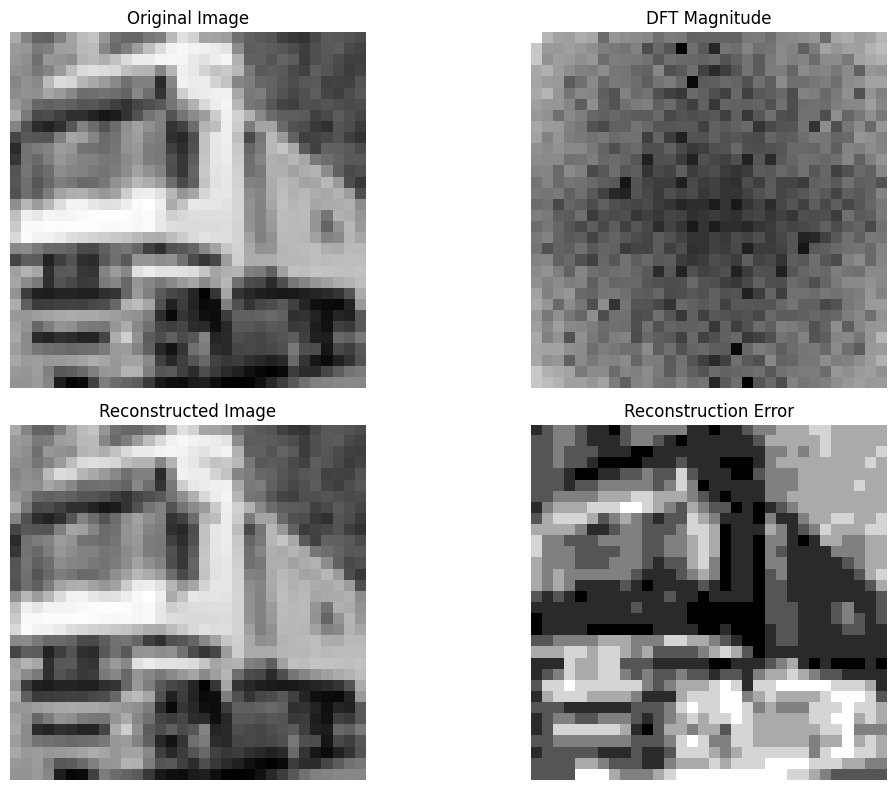

In [9]:
# Example usage for the first 10 images
for i in range(10):
    original_image = image[i] 
    process_and_plot_image(original_image)

In [22]:
# Function to perform avg pool wrt a particular kernel size using cv2
def avg_pool(img,kernel_size):
    return cv2.blur(img,(kernel_size,kernel_size))

# Function to pass the image through a lowpass filter
def lowpass(img,kernel_size,sigma):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

# Function to pass the image through a high pass filter
# (we subtract the lowpassed image from the original and add 127 to make the edges visible)
# another method is of laplacian filter that is better for detecting edges but here i used the above technique
def highpass(img, kernel_size, sigma):
    lowpassed=lowpass(img,kernel_size,sigma)
    return cv2.subtract(img,lowpassed)+127

# Function to sharpen the image using cv2 and a standard kernel to sharpen
def sharp_filter(img):
    kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return cv2.filter2D(img, -1, kernel)
    

In [23]:
# Function for applying wiener filter on one channel
def wiener_filter(img, kernel, K):
    # Convert the image to float32 for DFT
    img_float = np.float32(img)

    # Perform DFT (Discrete Fourier Transform) of the image
    dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create the kernel in frequency domain by applying DFT on the kernel
    kernel_padded = np.zeros_like(img_float)
    kh, kw = kernel.shape
    kernel_padded[:kh, :kw] = kernel
    dft_kernel = cv2.dft(np.float32(kernel_padded), flags=cv2.DFT_COMPLEX_OUTPUT, nonzeroRows=kh)
    dft_kernel_shift = np.fft.fftshift(dft_kernel)

    # Compute the Wiener filter in the frequency domain
    H = dft_kernel_shift[:, :, 0] + 1j * dft_kernel_shift[:, :, 1]
    H_conj = np.conj(H)
    G = dft_shift[:, :, 0] + 1j * dft_shift[:, :, 1]

    # Wiener filter formula: H_conj / (|H|^2 + K) * G
    H_mag2 = np.abs(H) ** 2
    Wiener_filter = (H_conj / (H_mag2 + K)) * G

    # Get the real and imaginary parts and combine them
    Wiener_filter_shift = np.stack((np.real(Wiener_filter), np.imag(Wiener_filter)), axis=-1)

    # Inverse DFT to get the filtered image back in the spatial domain
    f_ishift = np.fft.ifftshift(Wiener_filter_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize the result
    cv2.normalize(img_back, img_back, 0, 255, cv2.NORM_MINMAX)

    return np.uint8(img_back)

# Function for applying dft to each channel of the image and merging them at the end
def wiener_filter_rgb(img, kernel, K):
    # Split the image into its R, G, and B channels
    channels = cv2.split(img)
    
    # Apply Wiener filter to each channel independently
    filtered_channels = []
    for channel in channels:
        filtered_channel = wiener_filter(channel, kernel, K)
        filtered_channels.append(filtered_channel)
    
    # Merge the filtered channels back into an RGB image
    filtered_img = cv2.merge(filtered_channels)
    return filtered_img

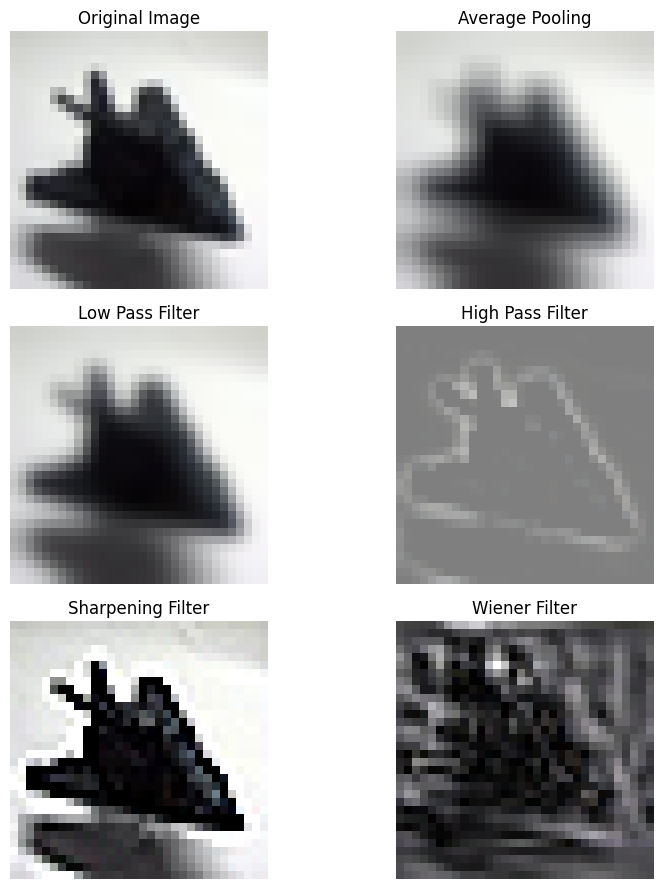

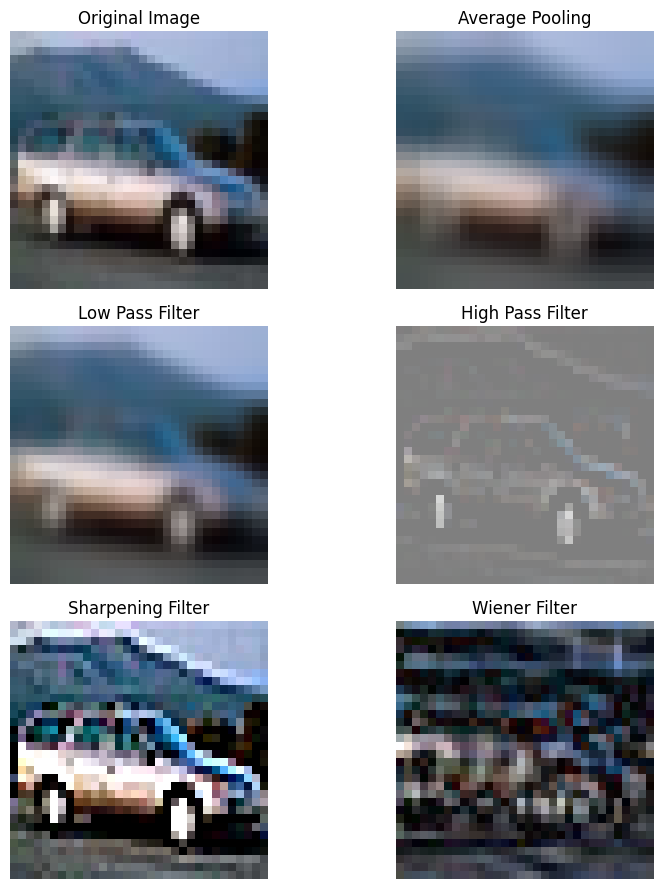

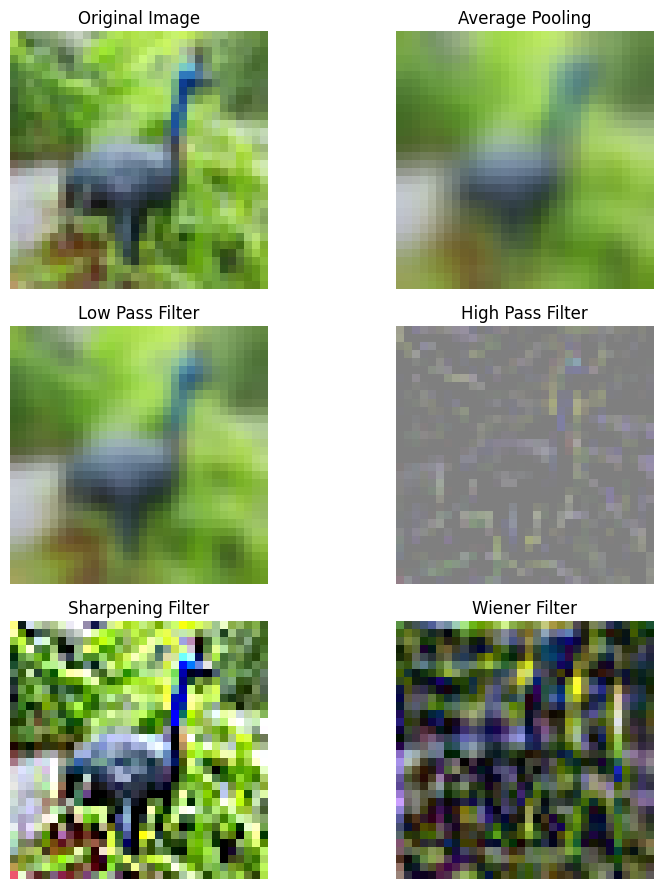

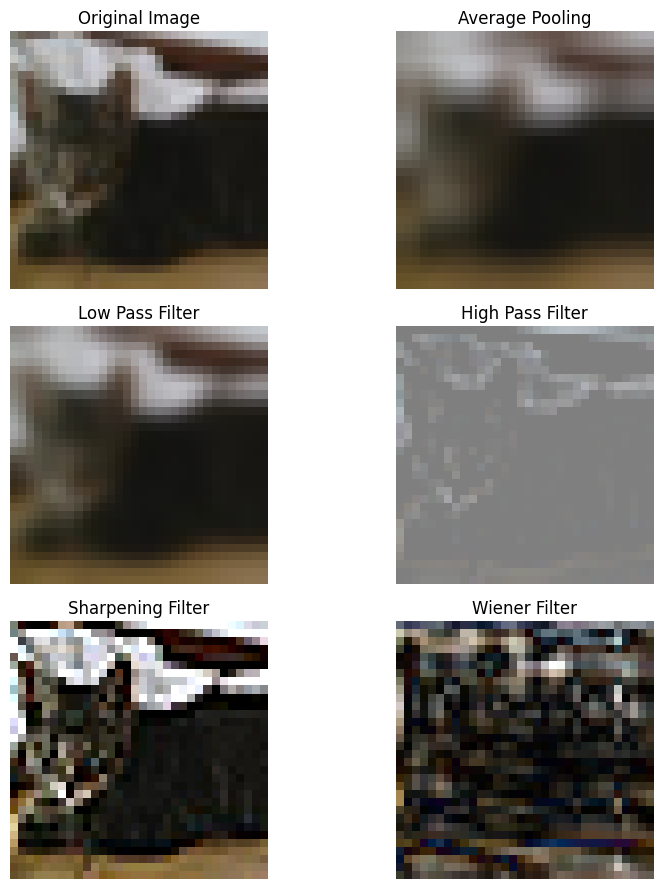

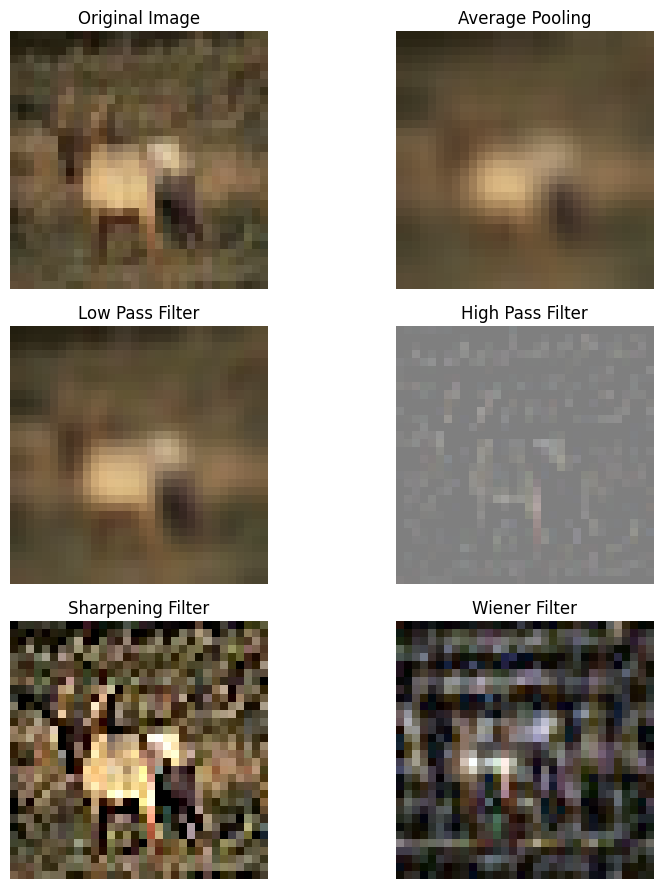

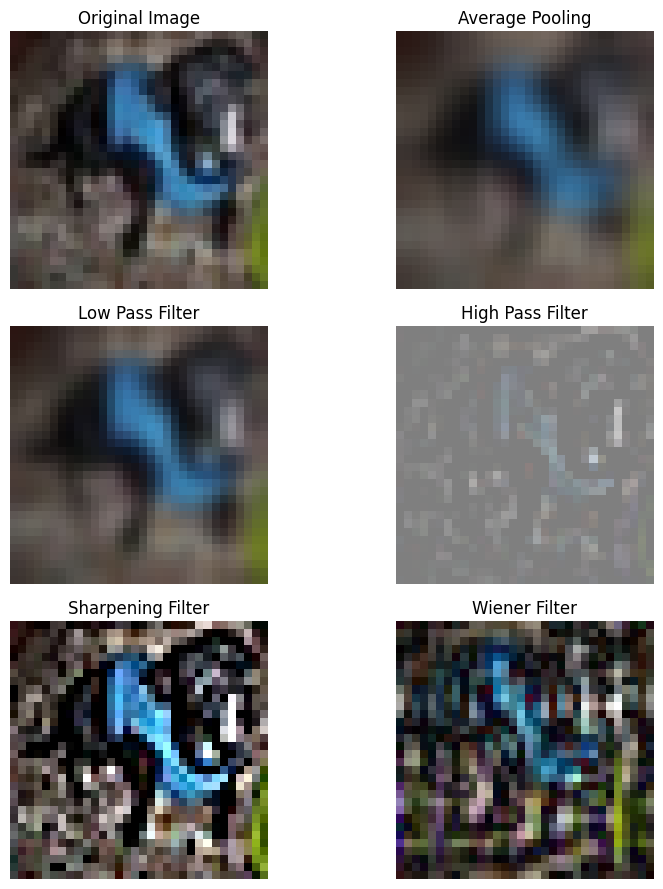

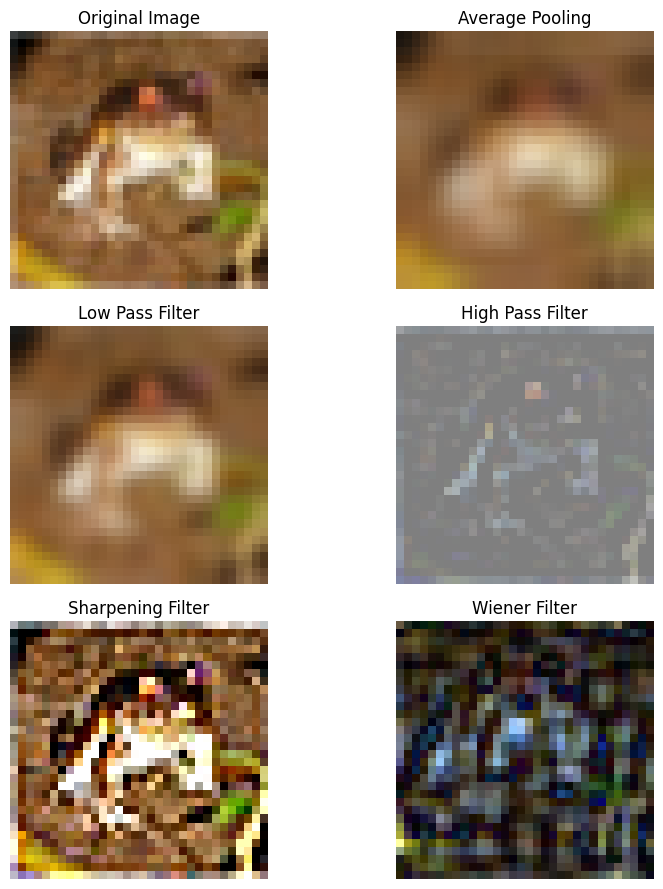

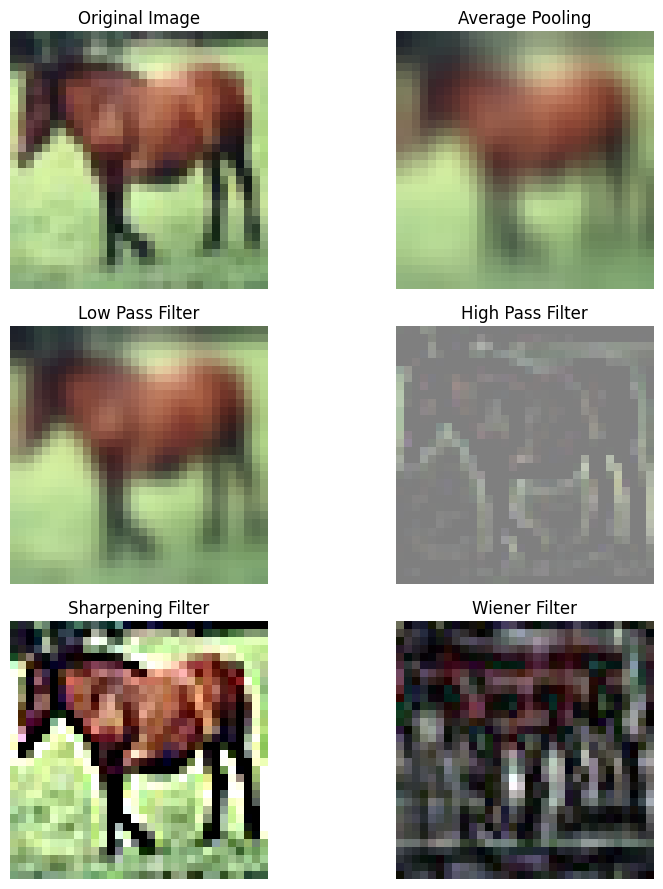

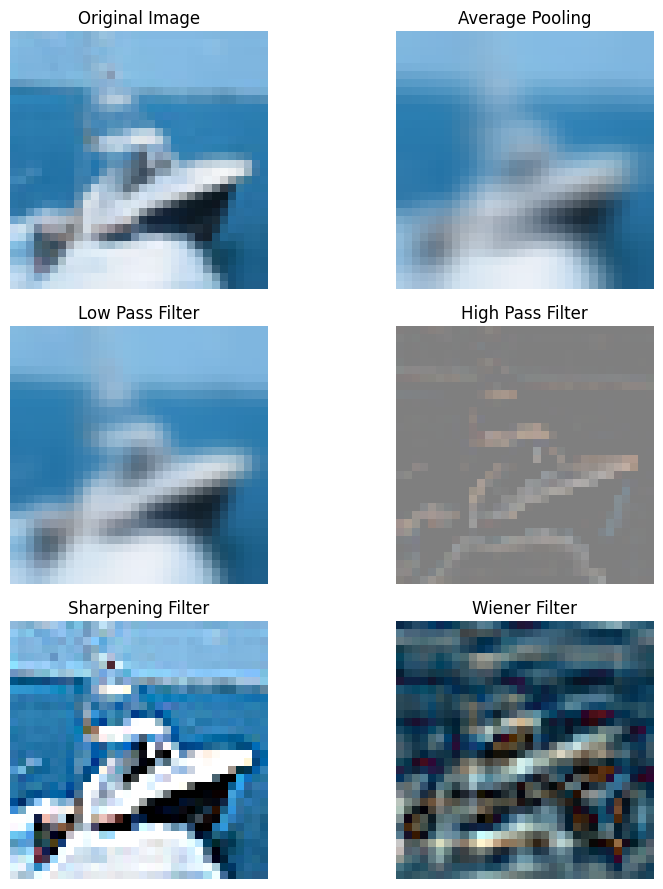

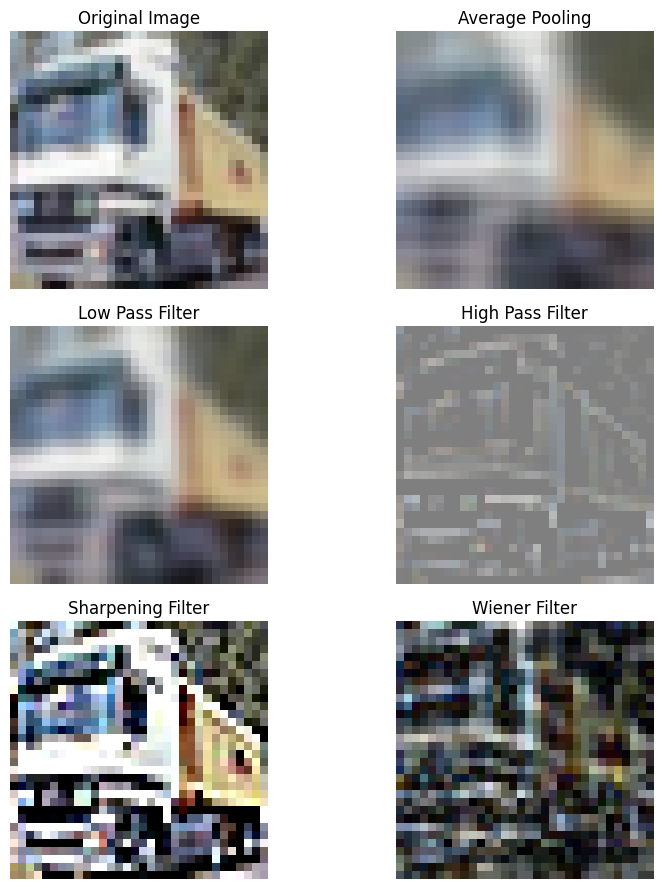

In [24]:
for i in range(10):
    img = pil_to_cv2_image(image[i])

    # Find all the images by applying various filters
    pooled_img = avg_pool(img, kernel_size=5)
    lowpass_img = lowpass(img, kernel_size=5, sigma=1)
    highpass_img = highpass(img, kernel_size=5, sigma=1)
    sharpened_img = sharp_filter(img)

    kernel = np.ones((5, 5), np.float32) / 25
    K=0.01
    filtered_img =wiener_filter_rgb(img, kernel, K)

    # Create a figure to display the images
    plt.figure(figsize=(9,9))

    # Display Original Image
    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying in matplotlib
    plt.title('Original Image')
    plt.axis('off')

    # Display Average Pooling Result
    plt.subplot(3, 2, 2)
    plt.imshow(cv2.cvtColor(pooled_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Average Pooling')
    plt.axis('off')

    # Display Low Pass Filter Result
    plt.subplot(3, 2, 3)
    plt.imshow(cv2.cvtColor(lowpass_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Low Pass Filter')
    plt.axis('off')

    # Display High Pass Filter Result
    plt.subplot(3, 2, 4)
    plt.imshow(cv2.cvtColor(highpass_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('High Pass Filter')
    plt.axis('off')

    # Display Sharpening Filter Result
    plt.subplot(3, 2, 5)
    plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Sharpening Filter')
    plt.axis('off')

    # Display Wiener Filter Result
    plt.subplot(3, 2, 6)
    plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Wiener Filter')
    plt.axis('off')

    # Adjust layout and show the figure
    plt.tight_layout()
    plt.show()

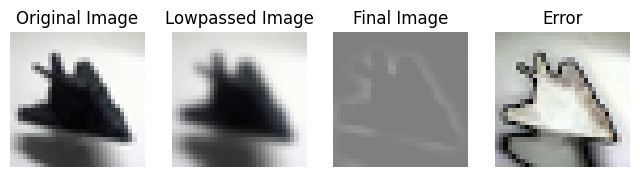

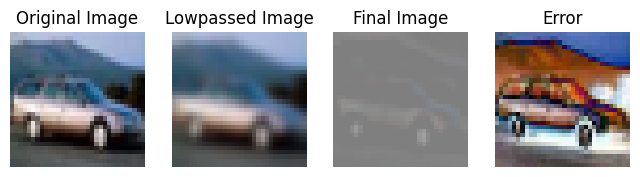

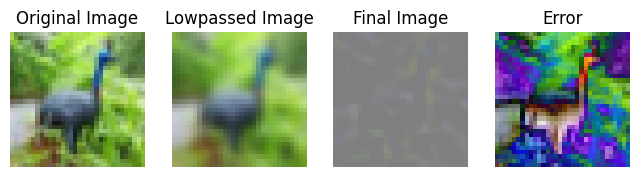

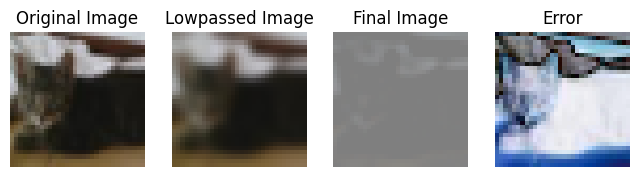

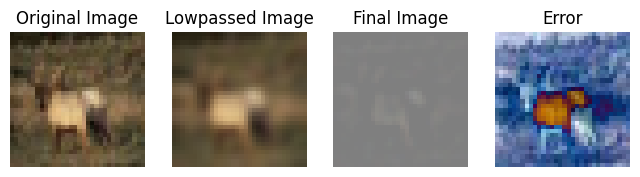

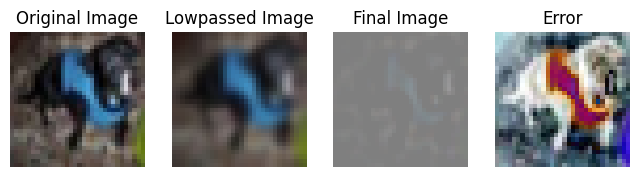

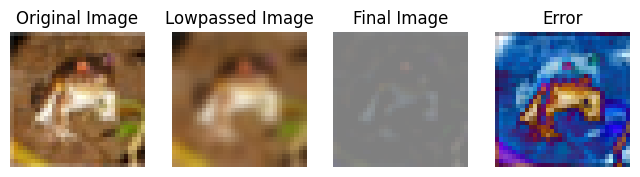

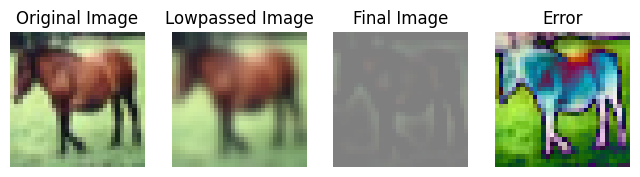

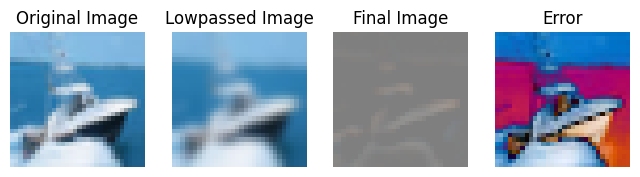

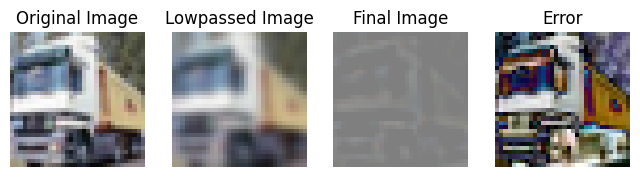

In [31]:
for i in range(10):
    img = pil_to_cv2_image(image[i])
    lowpassed=lowpass(img,kernel_size=5,sigma=1)
    final=highpass(lowpassed,kernel_size=5,sigma=1)
    error=cv2.normalize(cv2.absdiff(final,img),None, 0, 255, cv2.NORM_MINMAX)
    plt.figure(figsize=(8,20))

    # Display Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying in matplotlib
    plt.title('Original Image')
    plt.axis('off')

    # Display after low pass filter 
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(lowpassed, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Lowpassed Image')
    plt.axis('off')

    # Display after lowpassed image is passed thorugh highpass filter 
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Final Image')
    plt.axis('off')

    # Display error
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(error, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Error')
    plt.axis('off')

From observation we see that basically on passing through lowpass filter we get smooth image and further on passing it through highpass filter we get the edges of lowpassed image. Futher if we compare it with highpassed image of original image, the edges are not prominent in the previous in comparison to the latter